<a id="top"></a>

# Breast Tumor Diagnosis (Classification)

# Outline

- [Read Data](#read_data)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [View descriptive statistics](#descriptive_statistics)
- [View target and feature distributions](#distributions)
- [View correlations](#correlations)
- [View relationships between target and features](#pair_plots)
- [Standardize predictors](#standardize_predictors)
- [Predictive models](#predictive_models)
- [Logistic regression](#logistic_regression)
- [K-nearest neighbors](#k_nearest_neighbors)
- [Linear discriminant analysis](#linear_discriminant_analysis)
- [Support vector machines](#support_vector_machines)
- [Random Forest](#random_forest)
- [Compare models](#compare_models)

# Import packages

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<a id="read_data"></a>

# Read data: [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)

In [3]:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()

# ['{}: {}'.format(i, name) for (i, name) in enumerate(list(breast_cancer.feature_names))]

In [4]:
# Use the following local filepath if you can't access the UCI url
wdbc_filepath = '../data/wisconsin_diagnostic_breast_cancer.csv'

headers = ['id', 'class', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
           'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

wdbc = pd.read_csv('https://archive.ics.uci.edu/ml/'
                   'machine-learning-databases'
                   '/breast-cancer-wisconsin/wdbc.data', names=headers)

In [5]:
class_mapping = {'M': 'malignant', 'B': 'benign'}
wdbc['class'] = wdbc['class'].map(class_mapping)

In [6]:
wdbc.head()

id      class  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302  malignant        17.99         10.38          122.80     1001.0   
1    842517  malignant        20.57         17.77          132.90     1326.0   
2  84300903  malignant        19.69         21.25          130.00     1203.0   
3  84348301  malignant        11.42         20.38           77.58      386.1   
4  84358402  malignant        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [7]:
wdbc.shape

(569, 32)

In [8]:
['{}: {}'.format(i, name) for (i, name) in enumerate(list(wdbc.columns[2:]))]

['0: radius_mean',
 '1: texture_mean',
 '2: perimeter_mean',
 '3: area_mean',
 '4: smoothness_mean',
 '5: compactness_mean',
 '6: concavity_mean',
 '7: concave_points_mean',
 '8: symmetry_mean',
 '9: fractal_dimension_mean',
 '10: radius_se',
 '11: texture_se',
 '12: perimeter_se',
 '13: area_se',
 '14: smoothness_se',
 '15: compactness_se',
 '16: concavity_se',
 '17: concave_points_se',
 '18: symmetry_se',
 '19: fractal_dimension_se',
 '20: radius_worst',
 '21: texture_worst',
 '22: perimeter_worst',
 '23: area_worst',
 '24: smoothness_worst',
 '25: compactness_worst',
 '26: concavity_worst',
 '27: concave_points_worst',
 '28: symmetry_worst',
 '29: fractal_dimension_worst']

The target variable is the classification: Malignant or Benign

The features are:
  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry
  - fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

<a id="create_y_and_X"></a>

# Create target, y, and predictor, X, variables

In [42]:
# X = breast_cancer.data
# y = np.where(breast_cancer.target == 0, 1, 0)

# print('Class labels:', np.unique(y), np.unique(breast_cancer.target_names), 
#       [(i, val) for (i, val) in enumerate(np.bincount(y))])

In [9]:
X = wdbc.iloc[:, 2:].values
y = np.where(wdbc['class'] == 'malignant', 1, 0)

print('Class labels:', np.unique(y), np.unique(wdbc['class']), 
      [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['benign' 'malignant'] [(0, 357), (1, 212)]


<a id="train_test_split"></a>

# [Split data into train and test sets](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
print('Labels counts in y:',       np.bincount(y),       
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train), 
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:',  np.bincount(y_test),  
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [357 212] [62.7, 37.3]
Labels counts in y_train: [250 148] [62.8, 37.2]
Labels counts in y_test: [107  64] [62.6, 37.4]


<a id="descriptive_statistics"></a>

# View descriptive statistics

In [12]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)), 
                    columns=['target']+list())

data.describe().T.round(2)

NameError: name 'breast_cancer' is not defined

<a id="distributions"></a>

# View target distribution

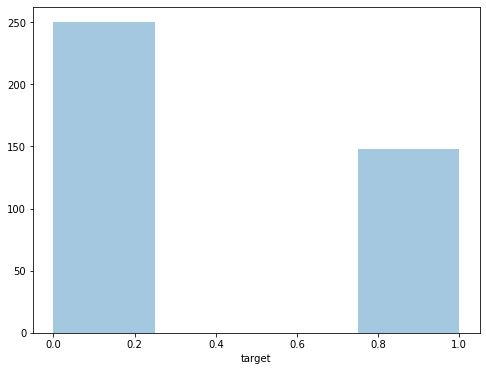

In [600]:
plt.subplots(figsize=(8,6))
sns.distplot(data.target, kde=False);

# View predictor distributions by target category

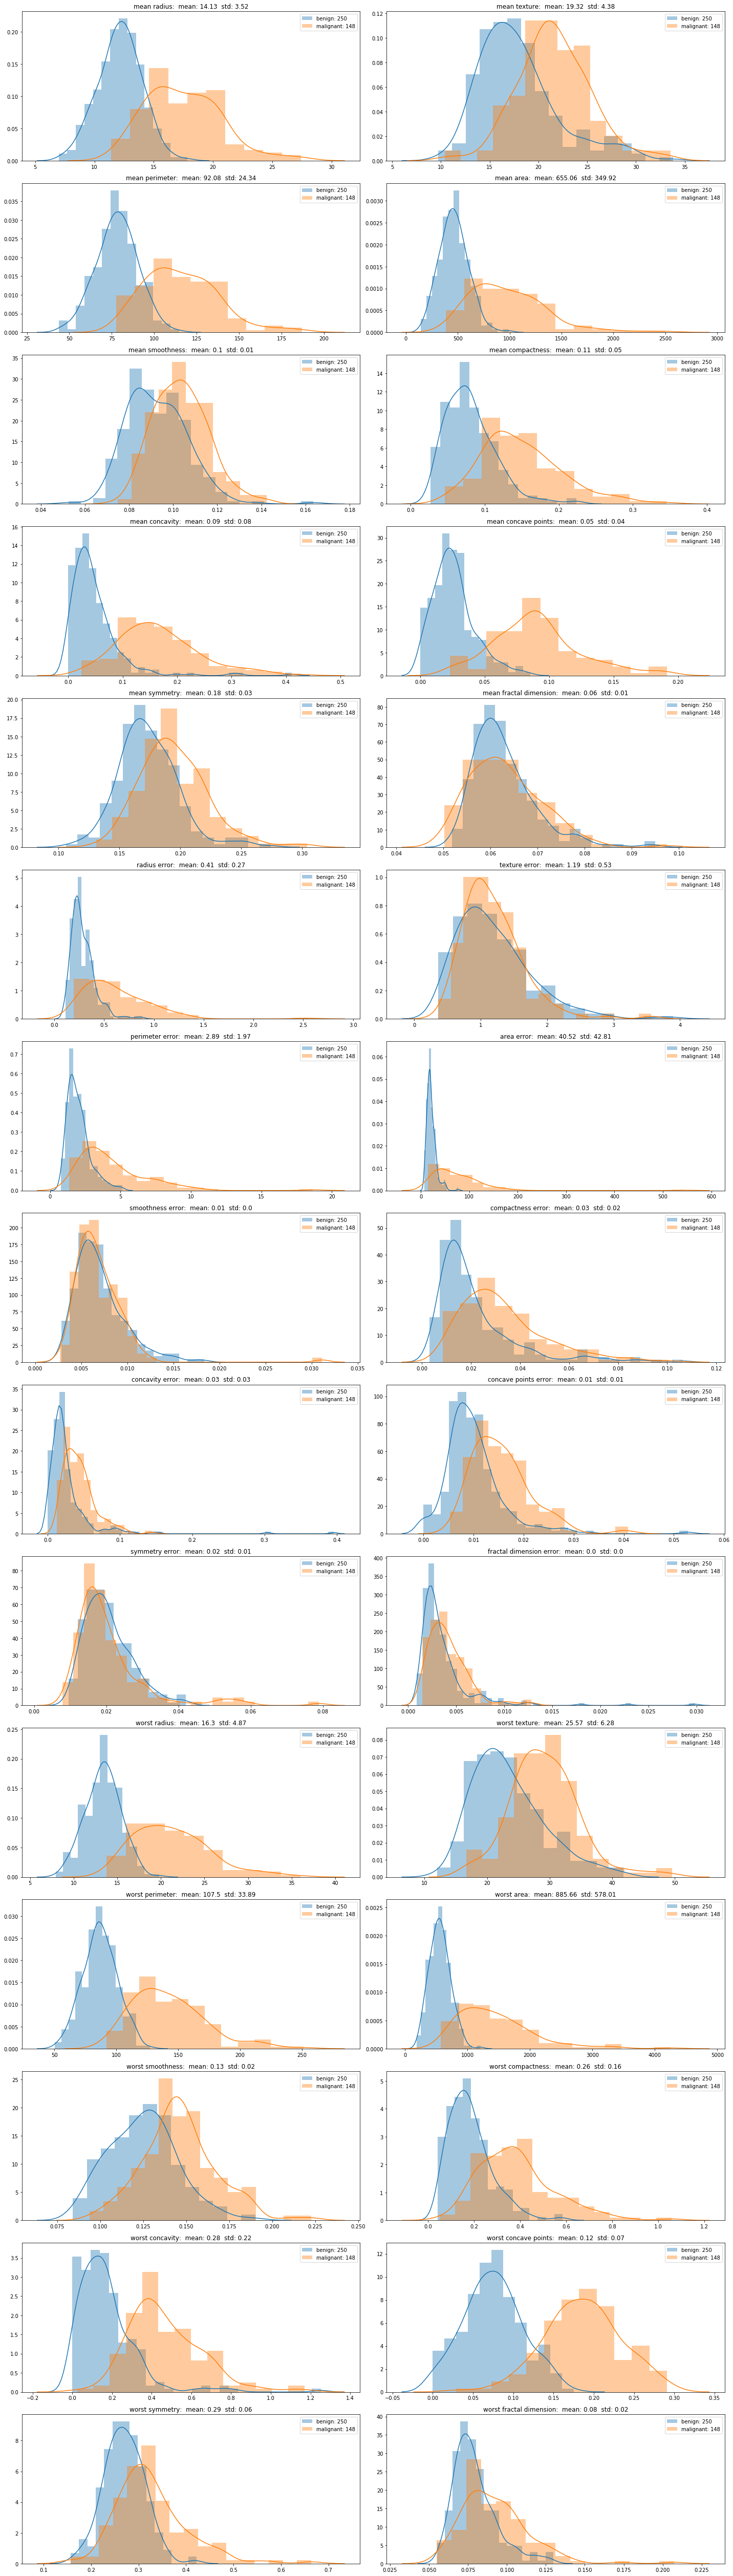

In [133]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format(np.unique(breast_cancer.target_names)[0], len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format(np.unique(breast_cancer.target_names)[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(breast_cancer.feature_names)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="correlations"></a>

# View predictor  [correlations](https://en.wikipedia.org/wiki/Correlation_and_dependence)

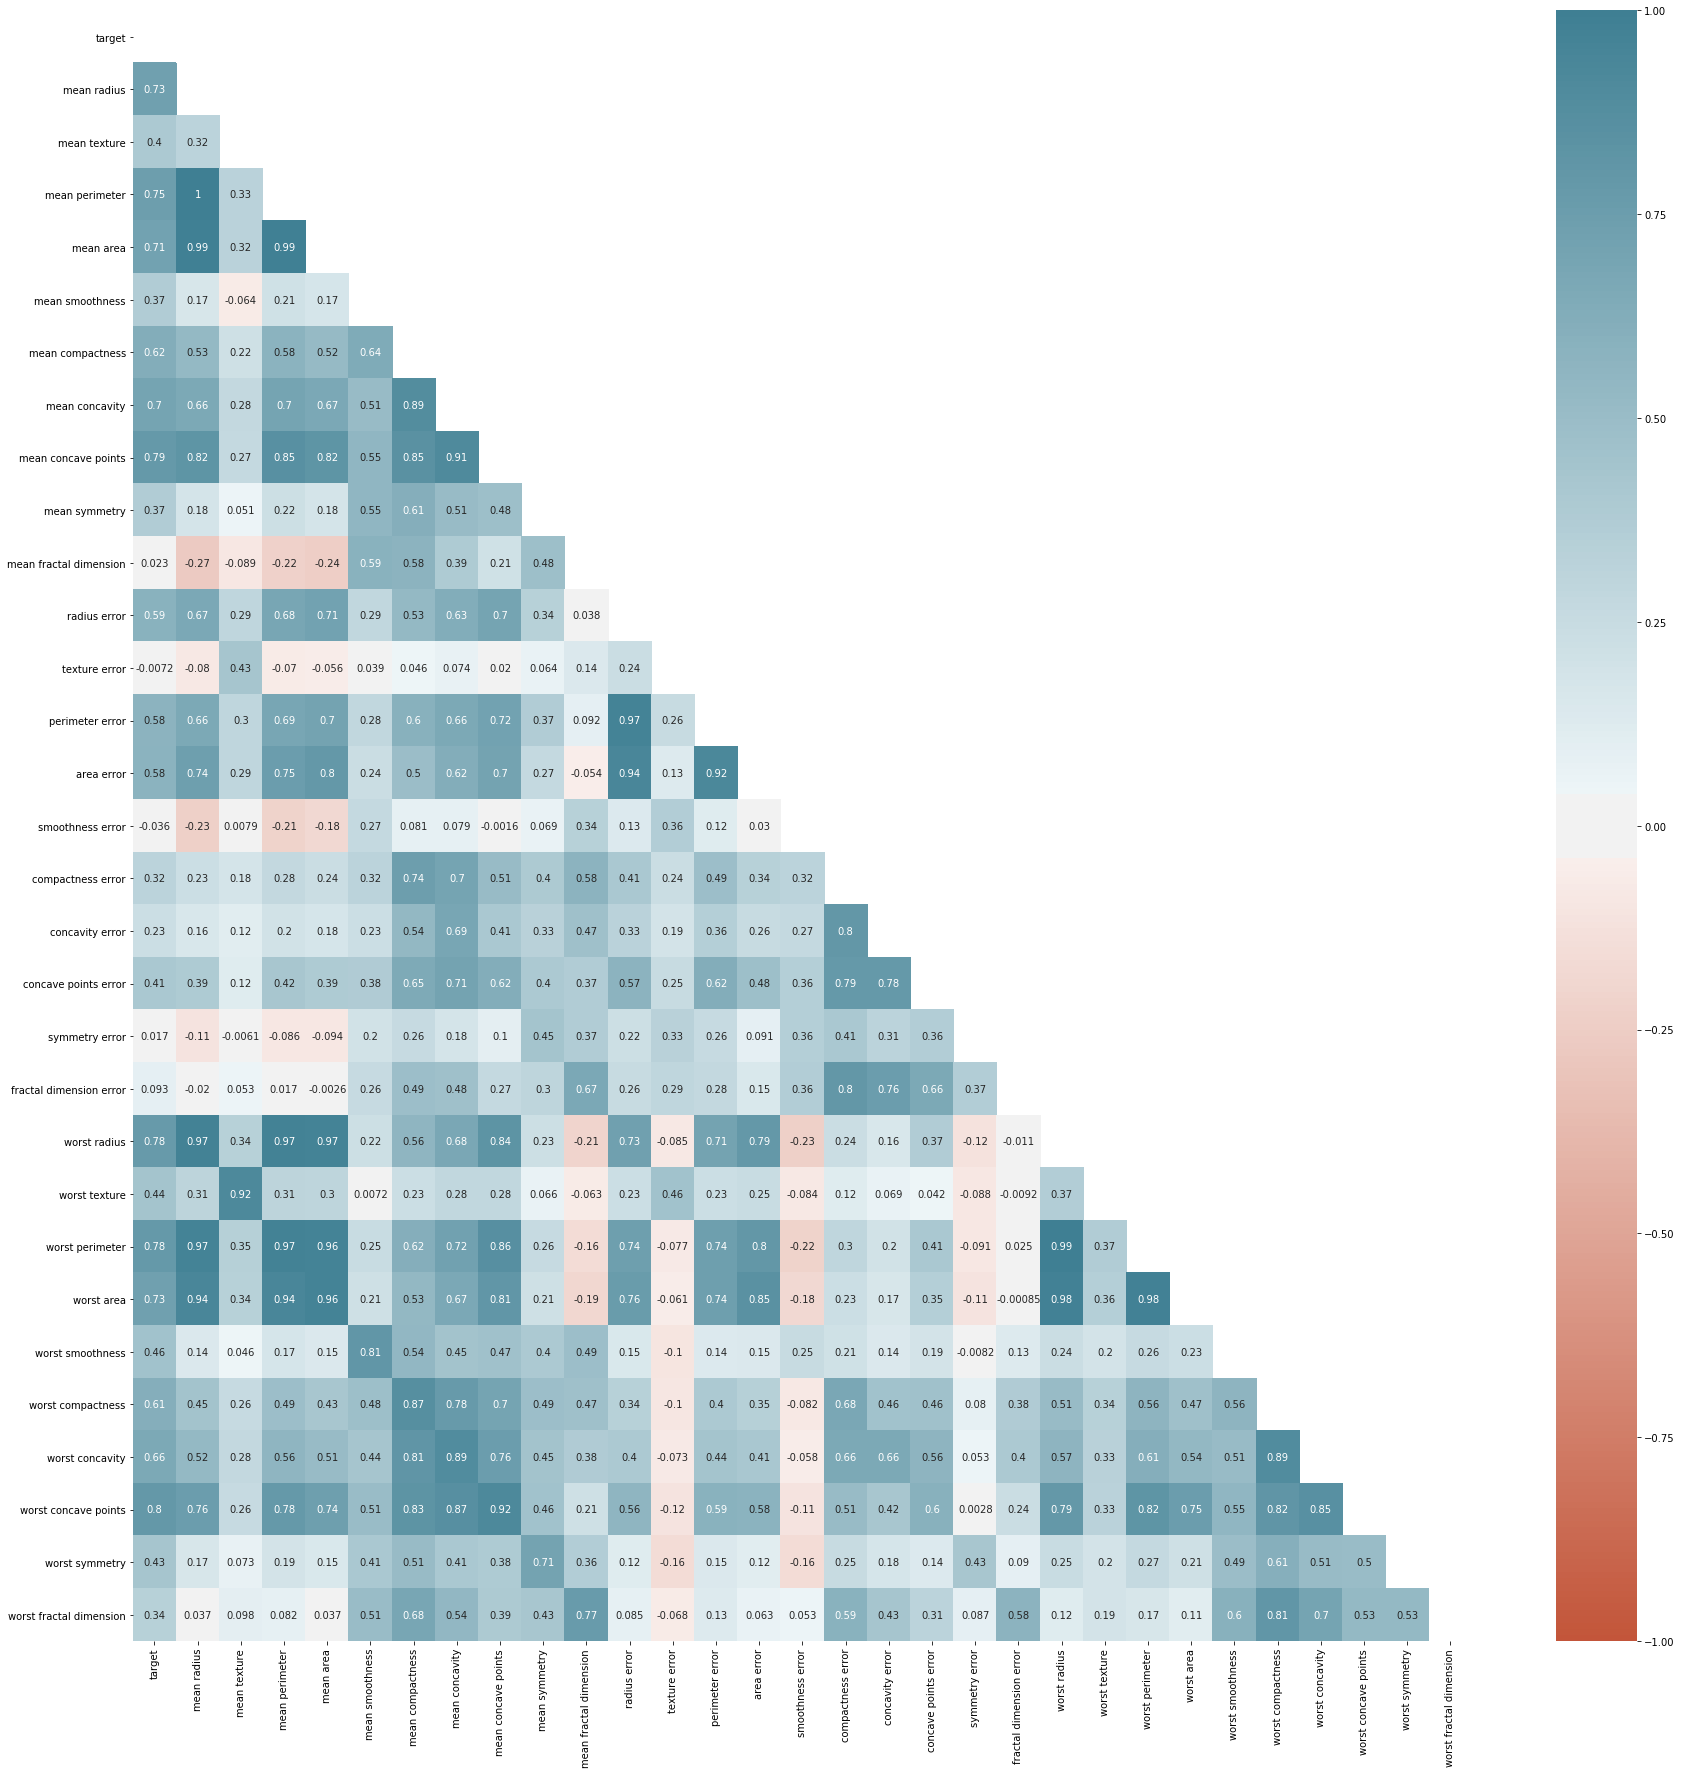

In [601]:
plt.figure(figsize=(30, 30))

# np.triu: https://numpy.org/doc/stable/reference/generated/numpy.triu.html
# sns.heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True, fmt='.2g', 
            mask=matrix, 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=256));

<a id="pair_plots"></a>

# Visualize distributions of, and relationships between, target and predictors

## Predictors containing the pattern "mean"

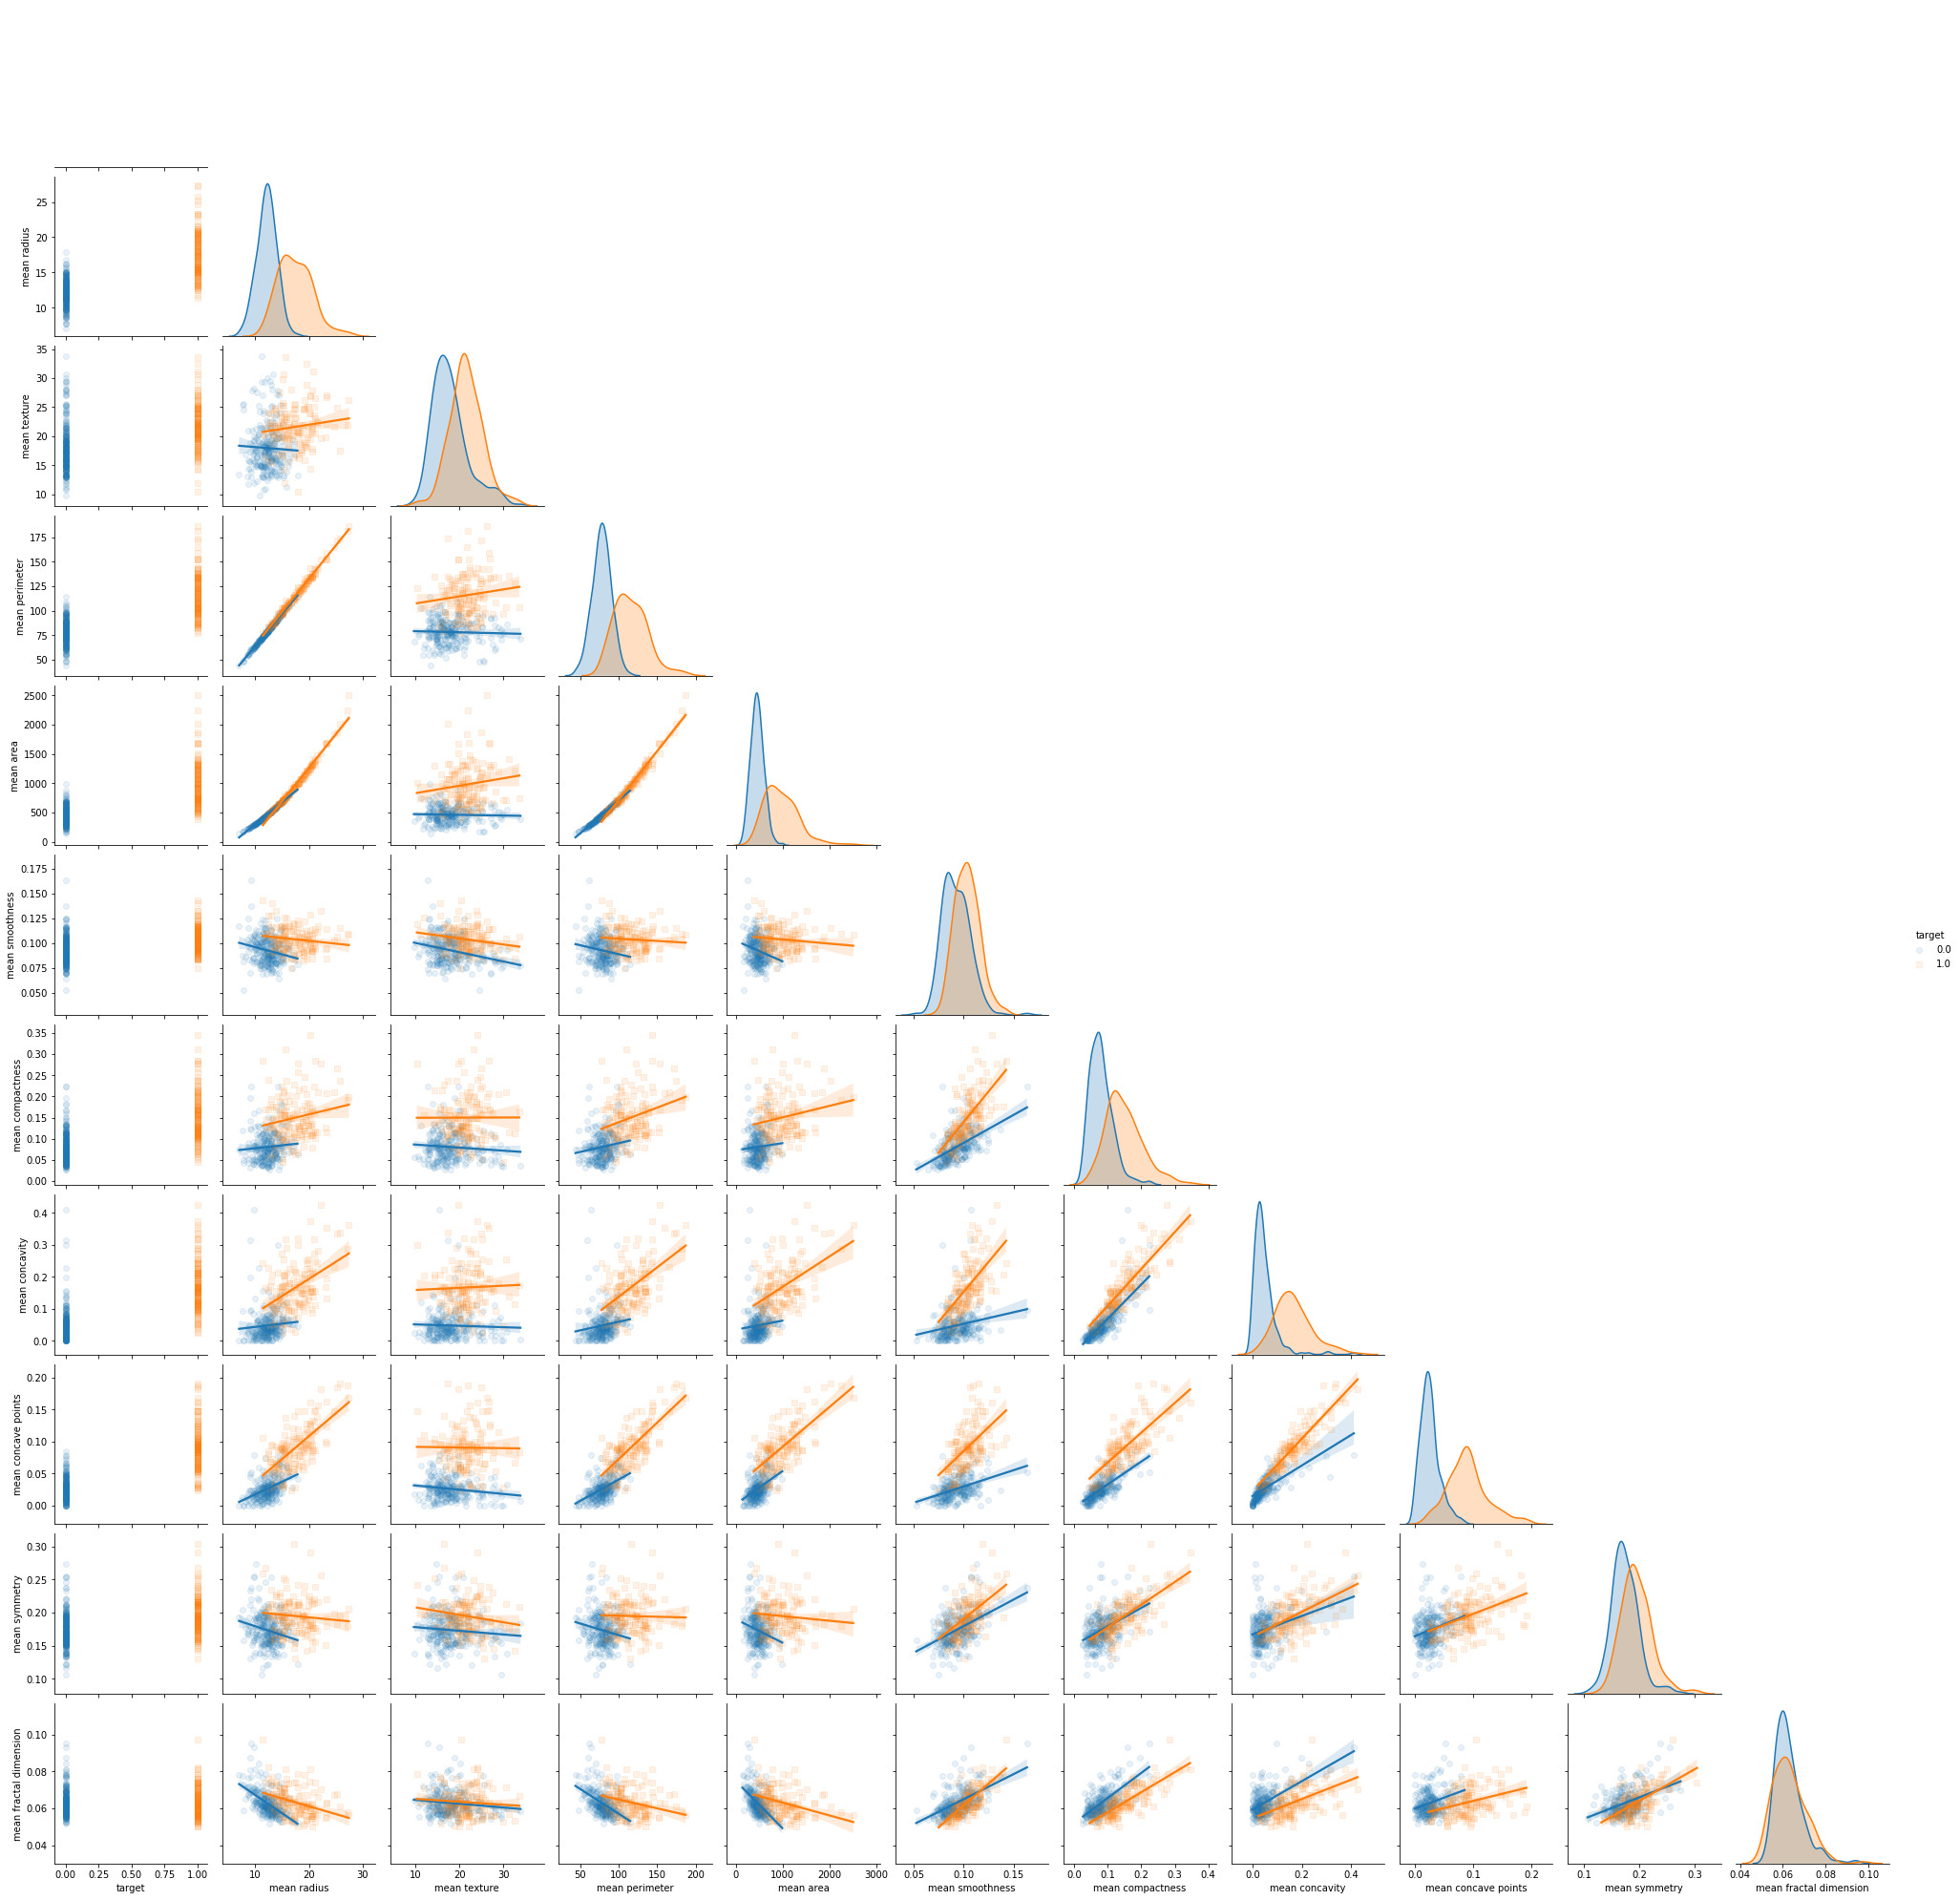

In [603]:
# target column + columns containing "mean"
sns.pairplot(data, 
             vars=['target']+list(data.filter(like='mean').columns), 
             kind='reg',
             hue='target', 
             markers=['o', 's'], 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.1}});

## Predictors containing the pattern "error"

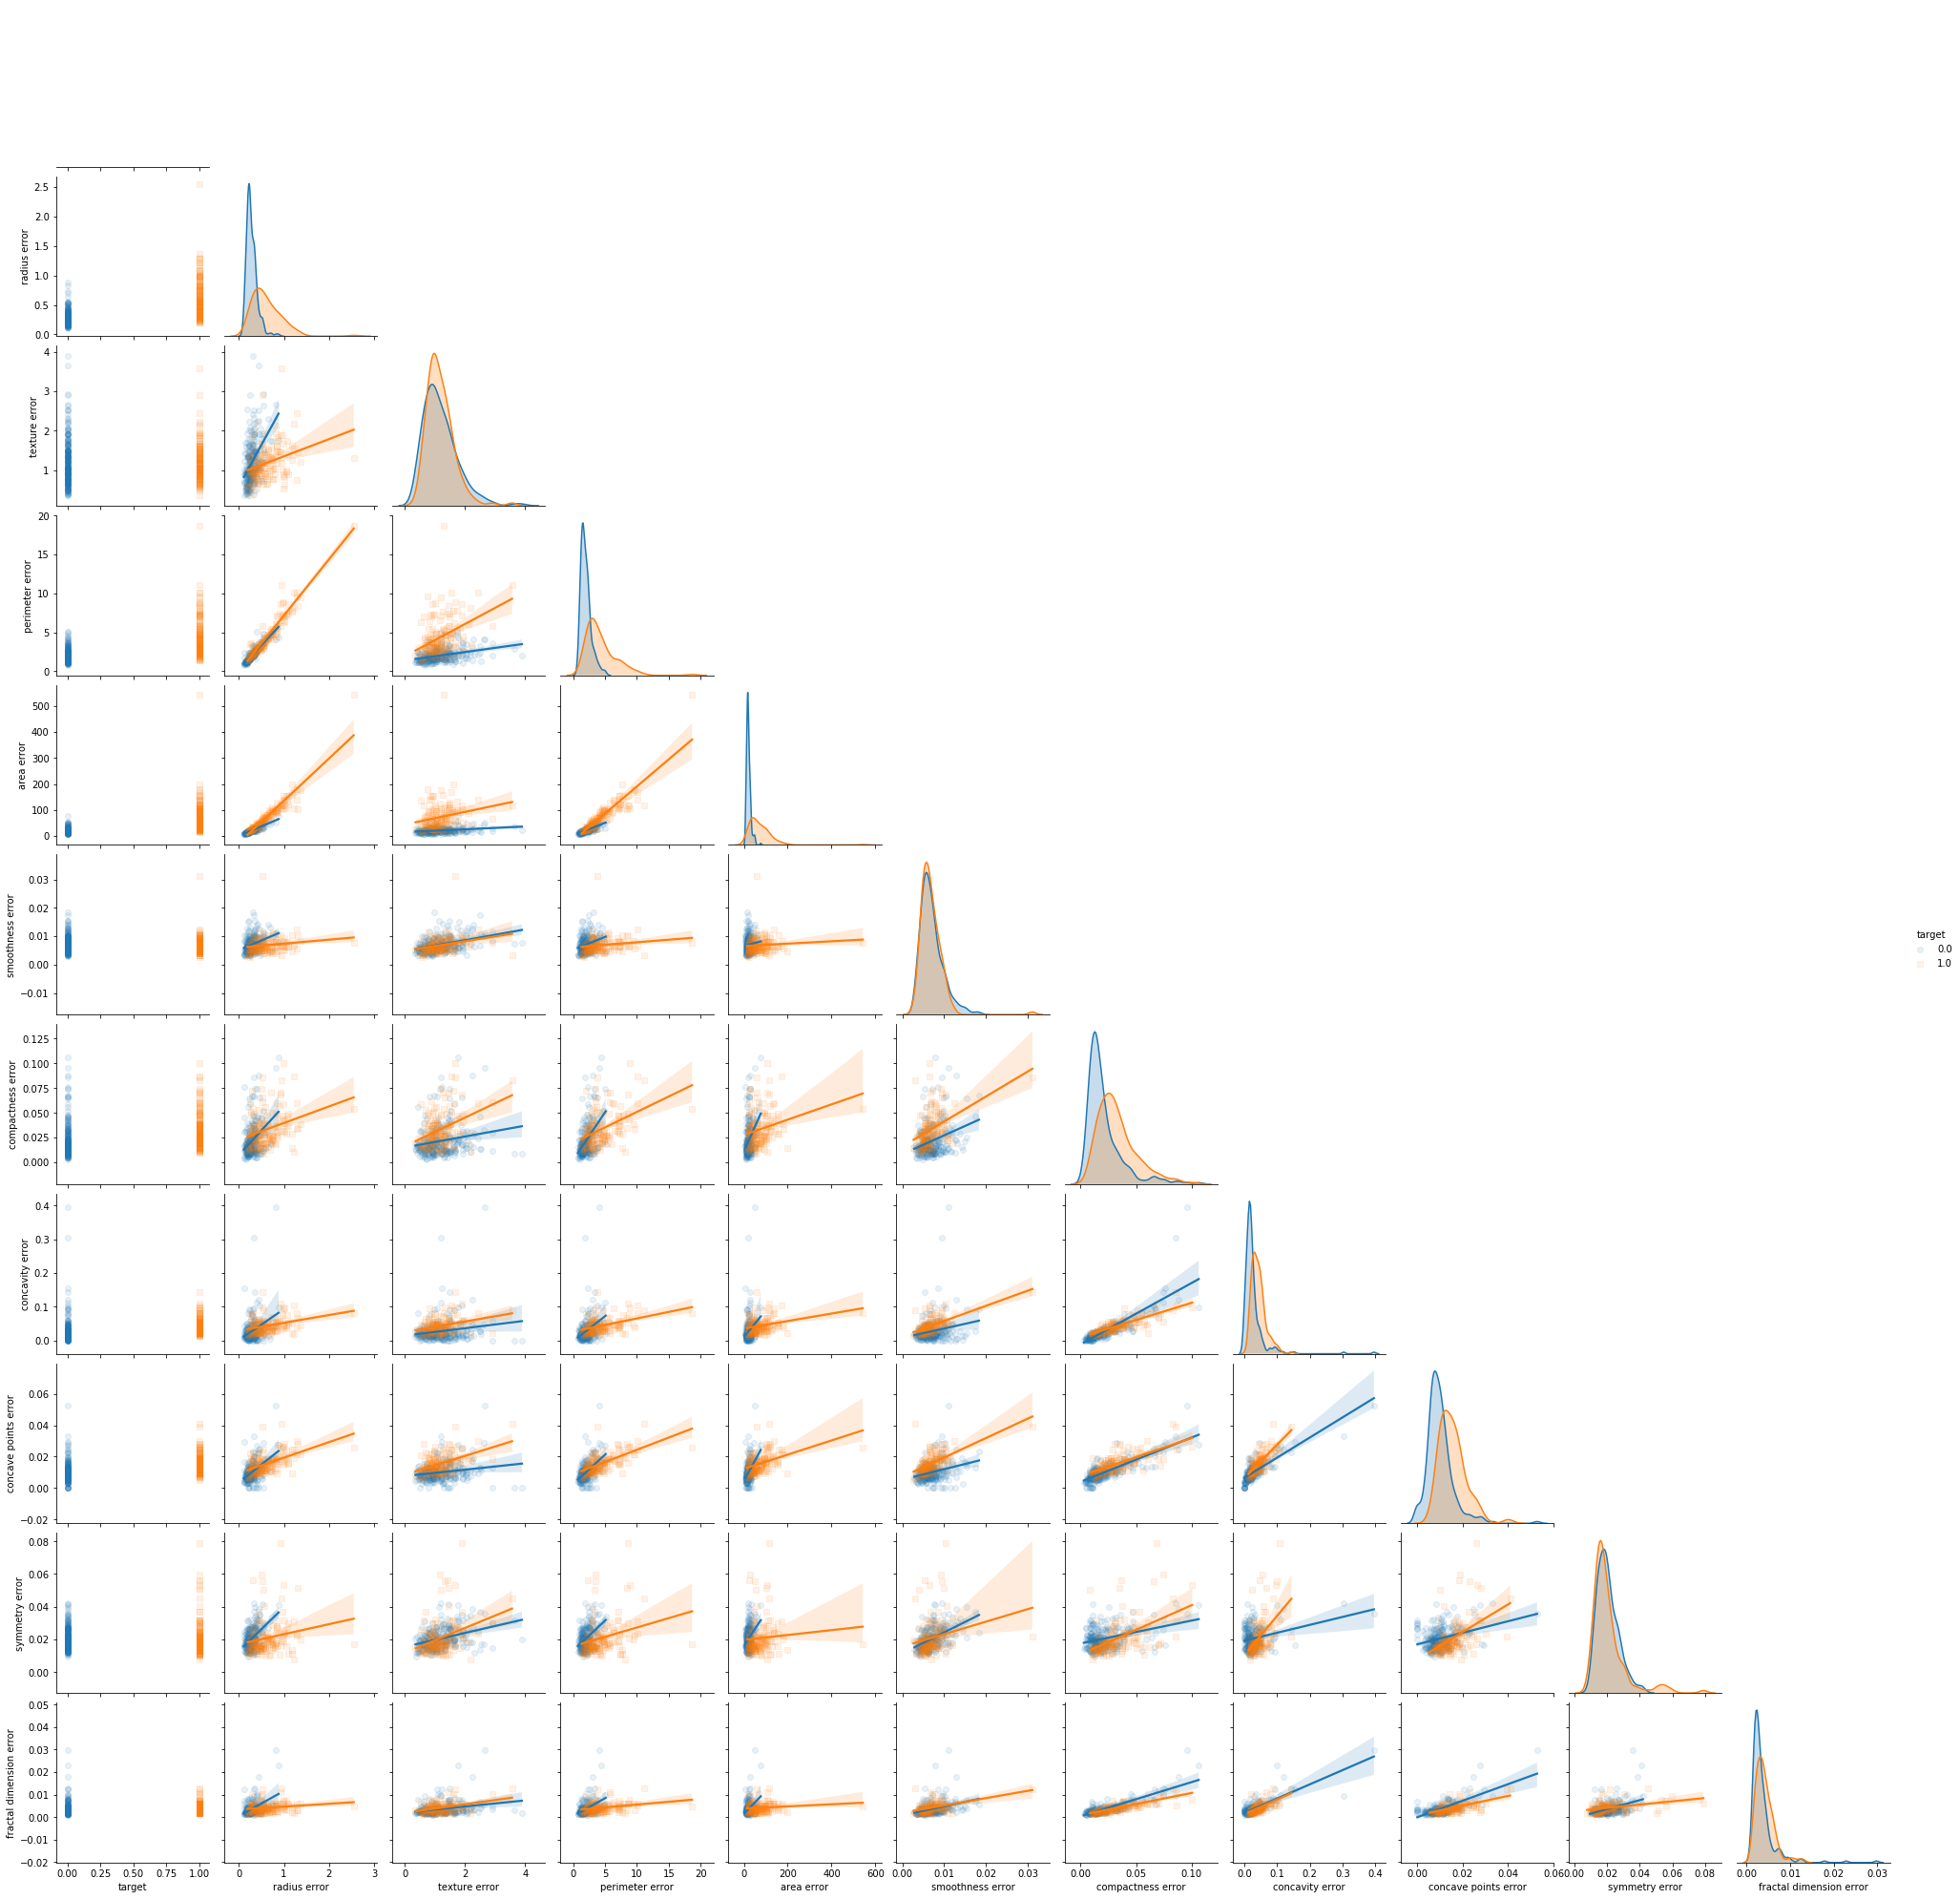

In [421]:
# target column + columns containing "error"
sns.pairplot(data, 
             vars=['target']+list(data.filter(like='error').columns), 
             kind='reg',
             hue='target', 
             markers=['o', 's'], 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.1}});

## Predictors containing the pattern "worst"

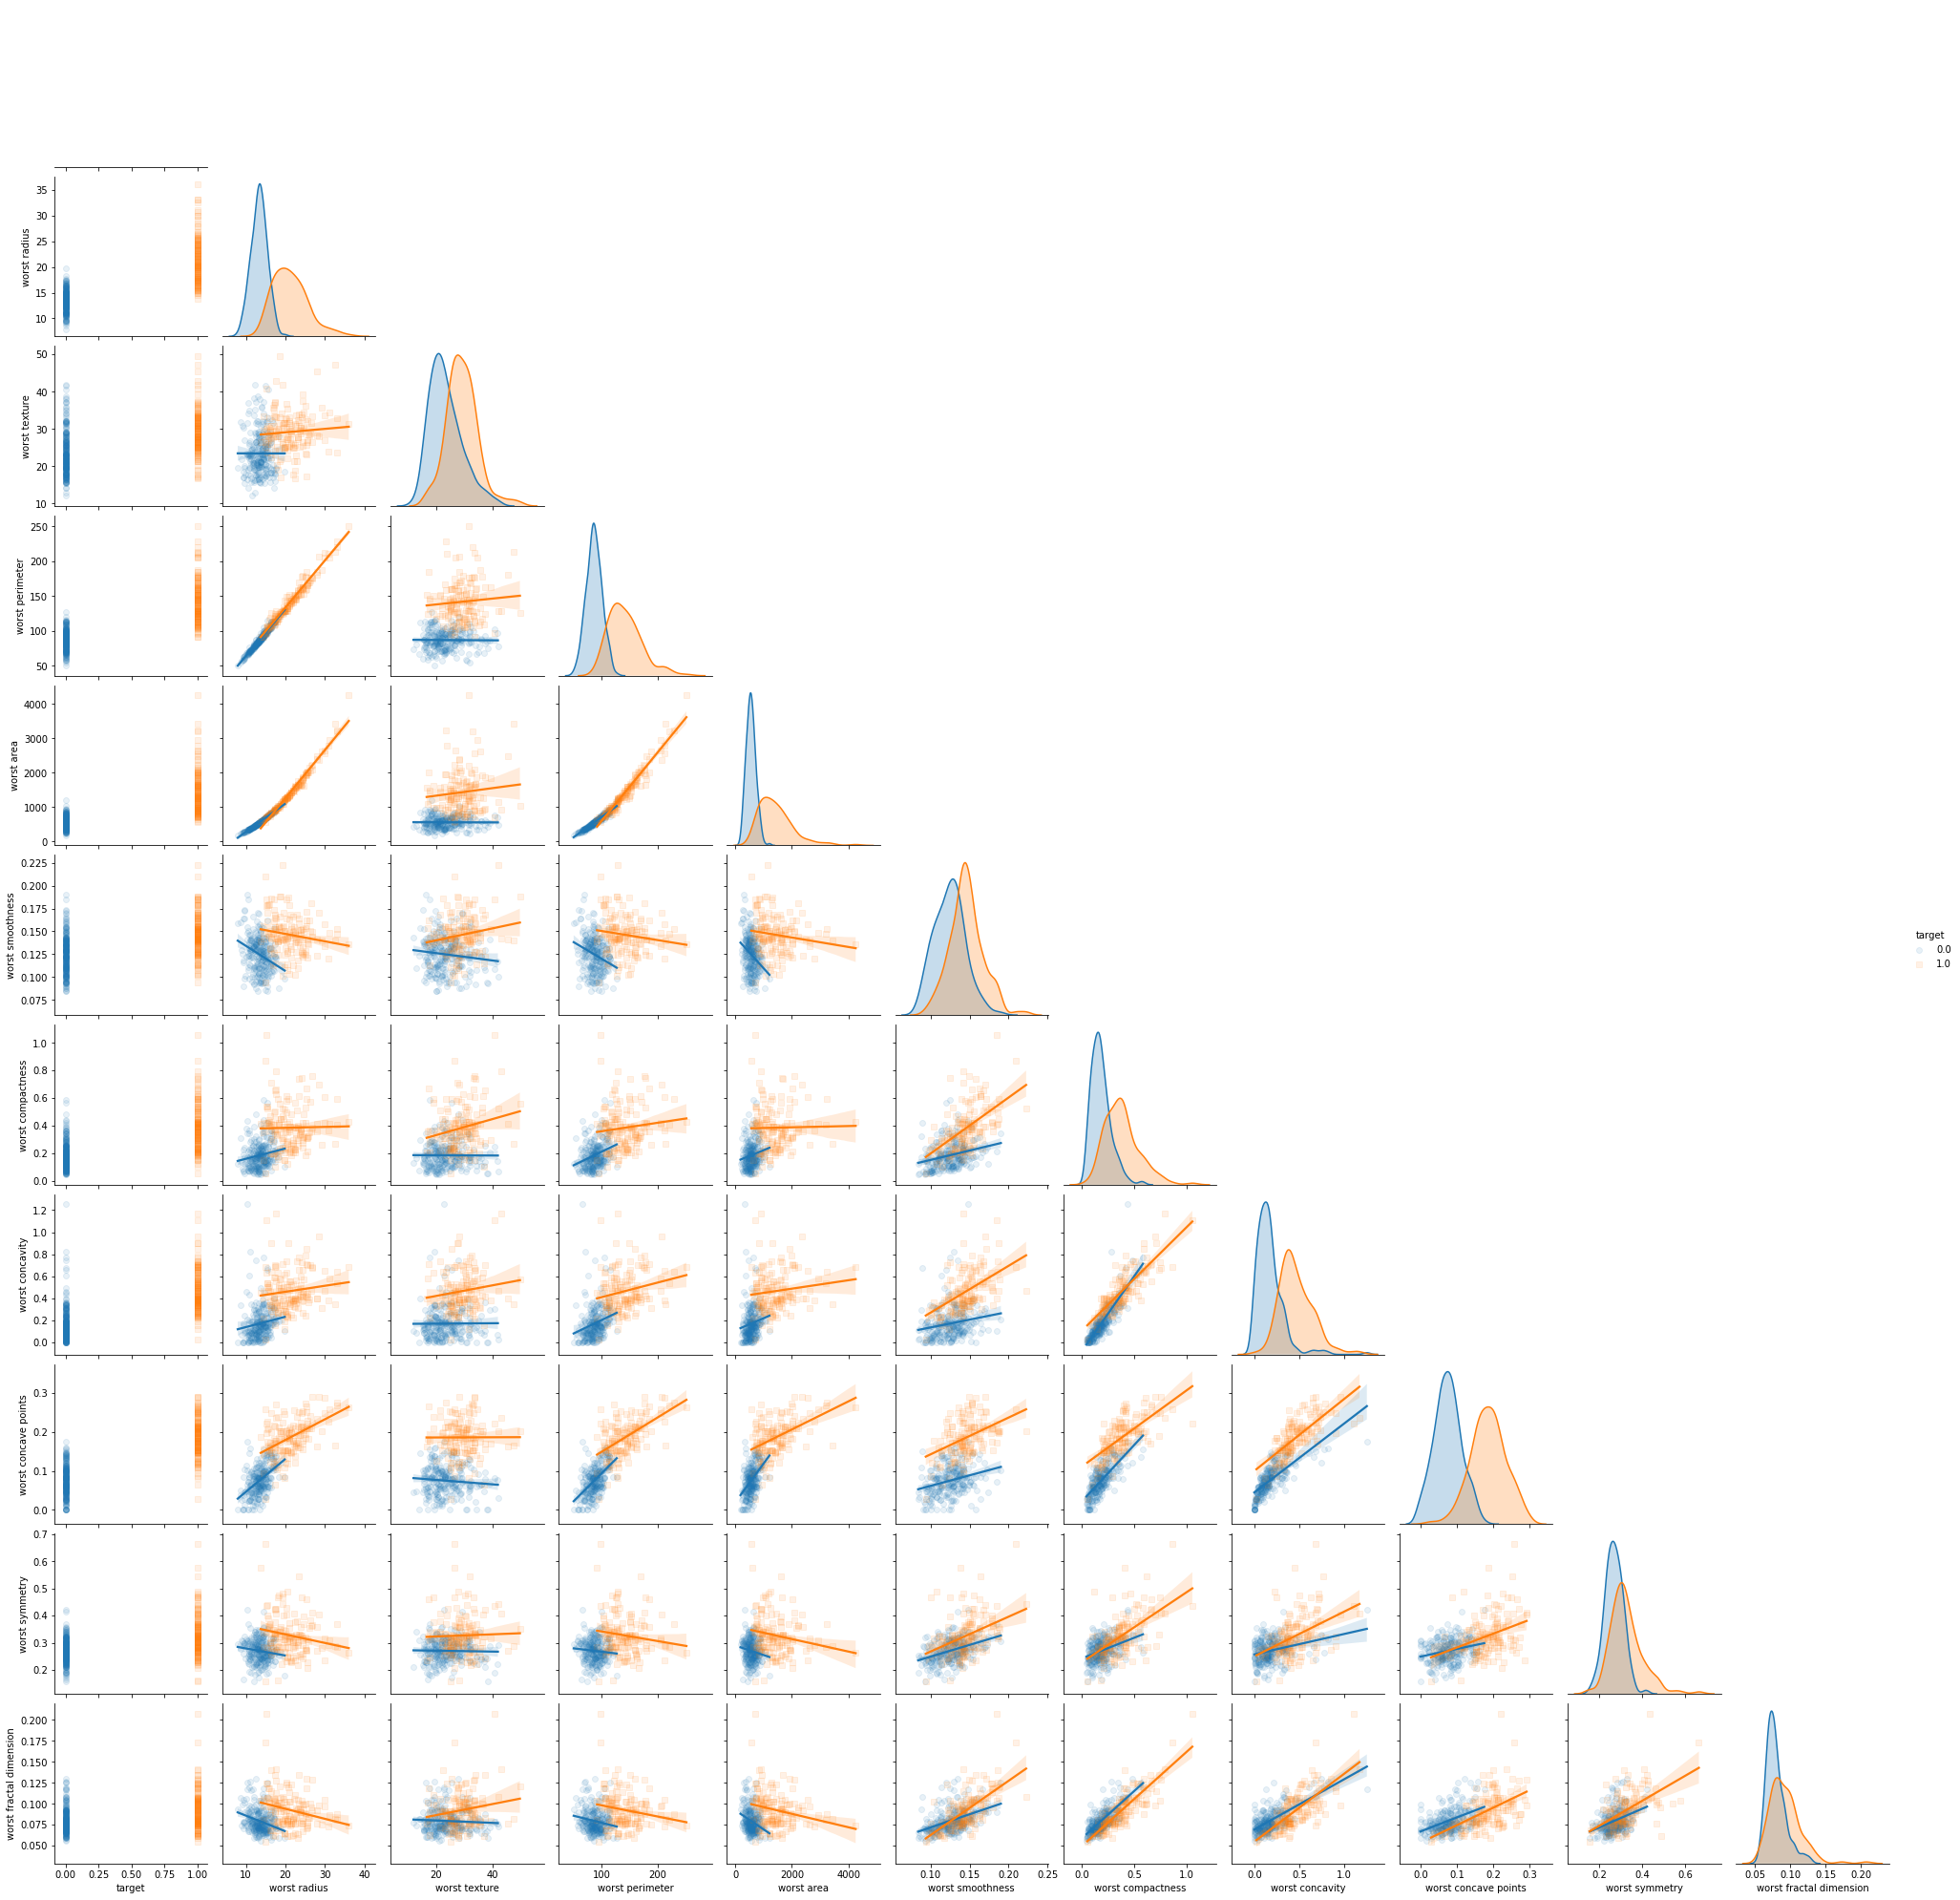

In [422]:
# target column + columns containing "worst"
sns.pairplot(data, 
             vars=['target']+list(data.filter(like='worst').columns), 
             kind='reg',
             hue='target', 
             markers=['o', 's'], 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.1}});

<a id="standardize_predictors"></a>

# [Standardize](https://scikit-learn.org/stable/modules/preprocessing.html) the Predictors

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# View standardized predictor distributions by target category

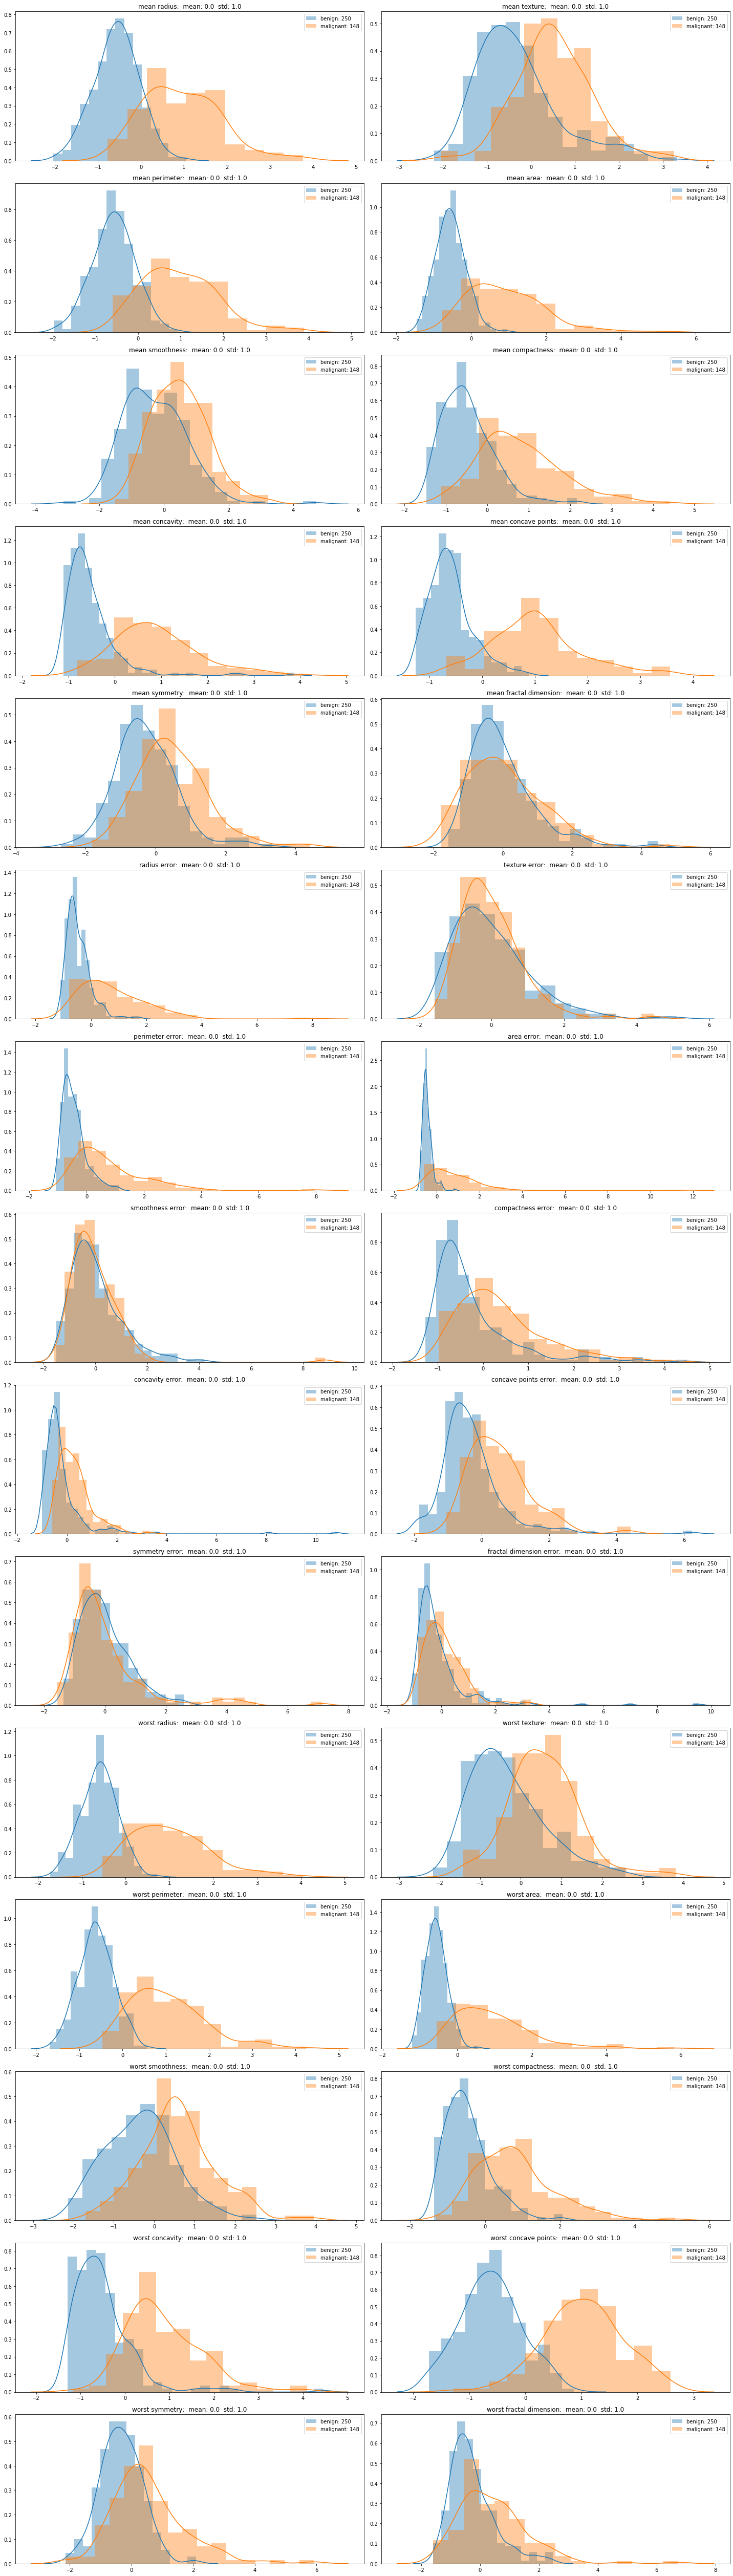

In [132]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train_std.T):
    # checking the means and stds for the separate target groups, benign and malignant
    # print('mean: {} std: {}'.format(abs(feat.mean().round(2)), feat.std().round(2)))
    # print('{}: mean: {} std: {}'.format(np.unique(breast_cancer.target_names)[0], feat[y_train==0].mean().round(2), feat[y_train==0].std().round(2)))
    # print('{}: mean: {} std: {}'.format(np.unique(breast_cancer.target_names)[1], feat[y_train==1].mean().round(2), feat[y_train==1].std().round(2)))
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format(np.unique(breast_cancer.target_names)[0], len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format(np.unique(breast_cancer.target_names)[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(breast_cancer.feature_names)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="predictive_models"></a>

# Predictive Models

# [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) estimator

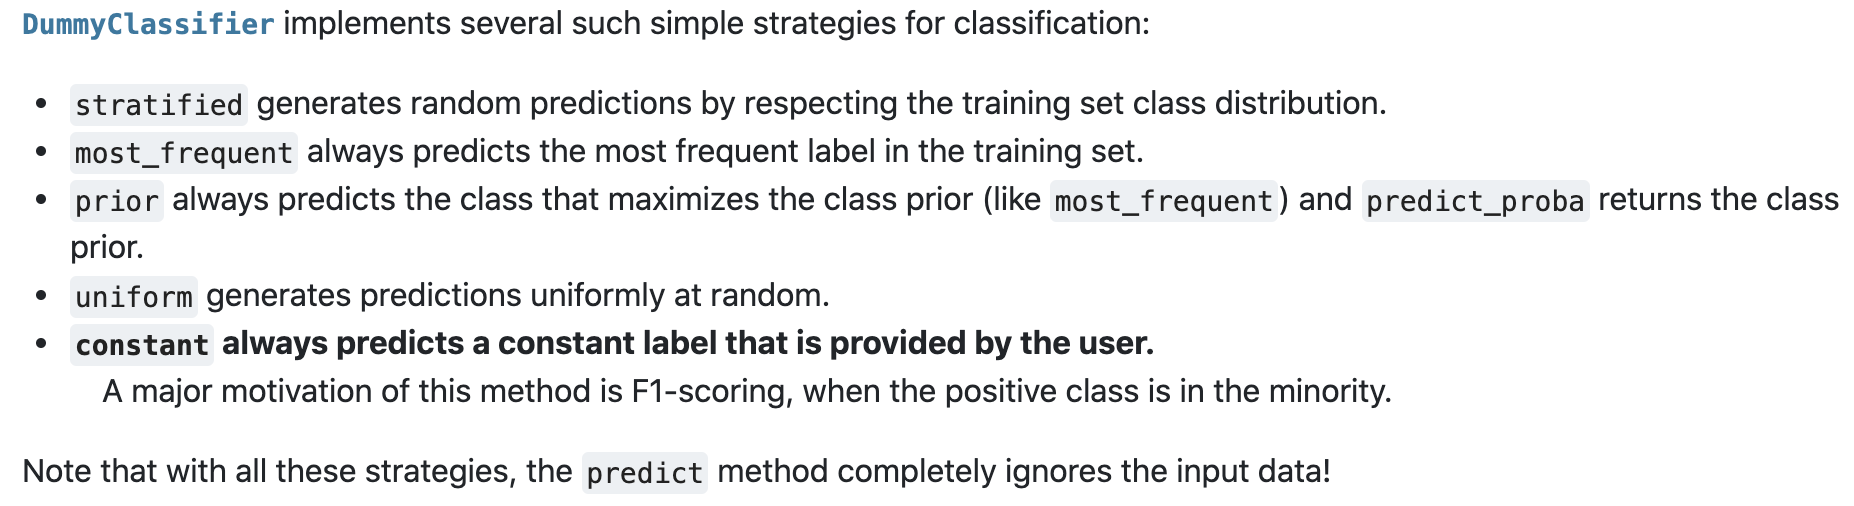

In [49]:
Image(filename='../images/dummy_classifier.png', width=800)

In [14]:
from sklearn.dummy import DummyClassifier

d_clf = DummyClassifier(strategy='constant', constant=1)
d_clf.fit(X_train_std, y_train)

print('Accuracy (train): {:.2f}'.format(d_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(d_clf.score(X_test_std,  y_test)))

Accuracy (train): 0.37
Accuracy  (test): 0.37


# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

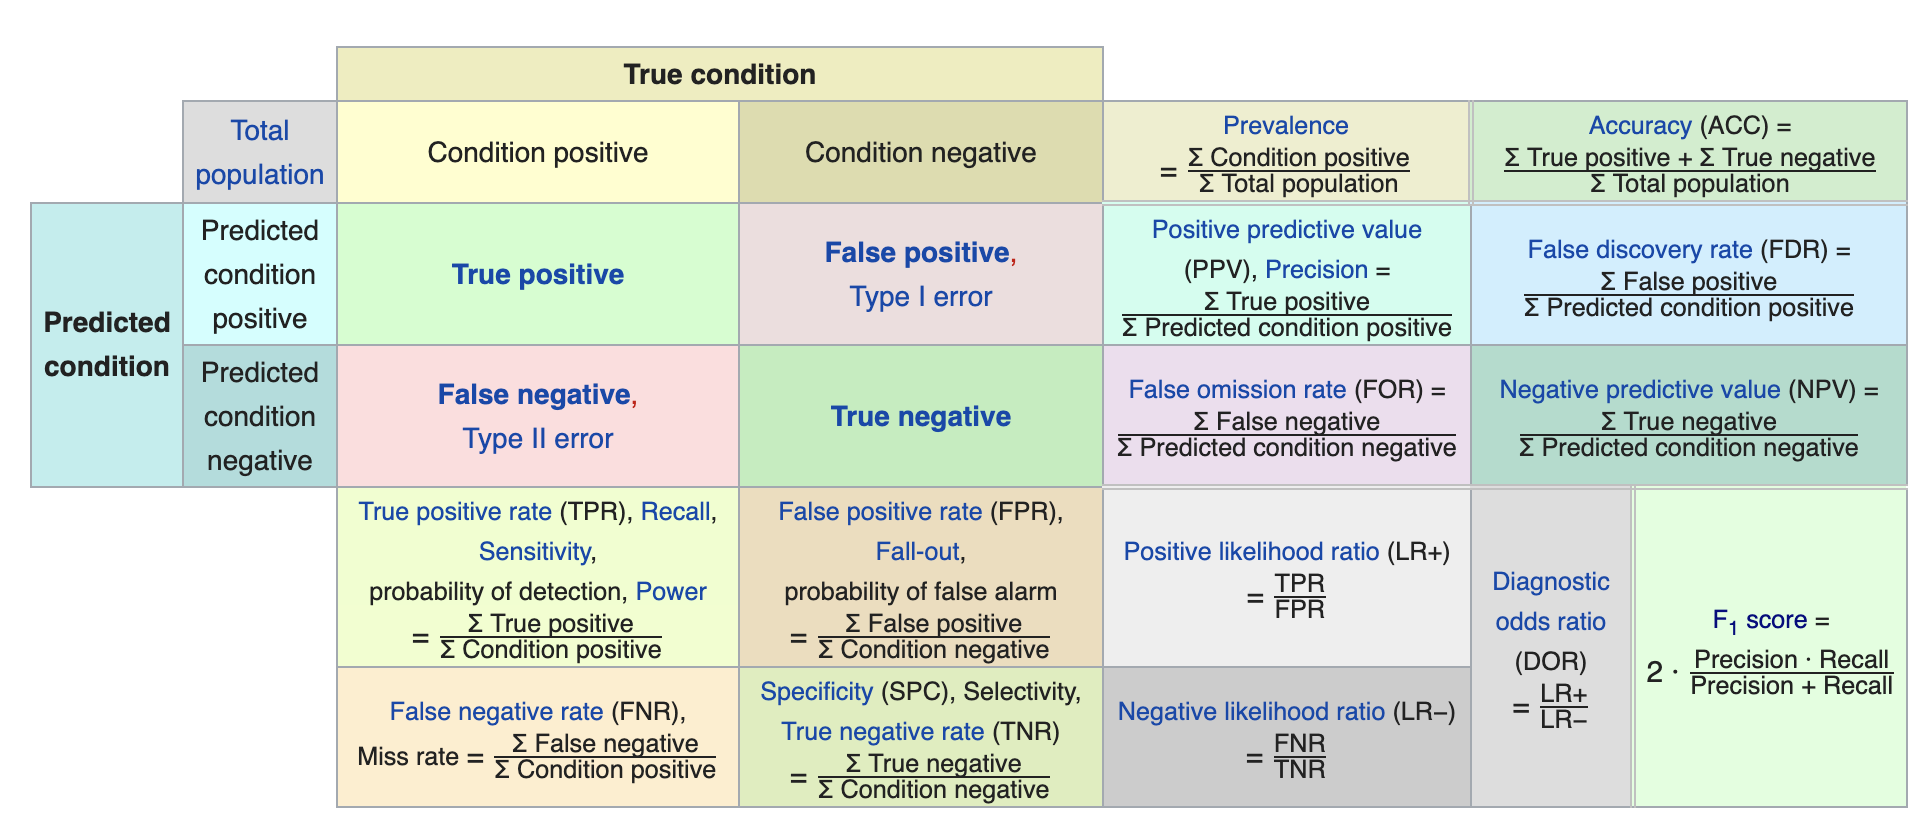

In [50]:
Image(filename='../images/binary_classification_table.png', width=900)

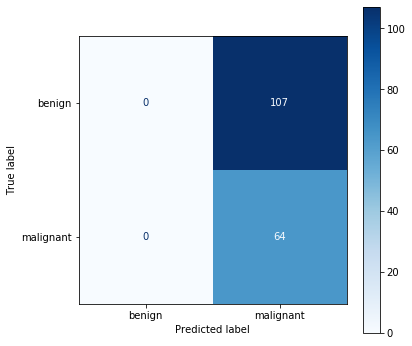

In [609]:
from sklearn.metrics import plot_confusion_matrix

f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(d_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # for float: '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

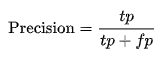

In [54]:
Image(filename='../images/def_precision.png', width=150)

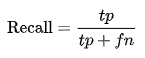

In [55]:
Image(filename='../images/def_recall.png', width=150)

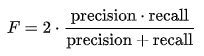

In [56]:
Image(filename='../images/def_F1_score.png', width=200)

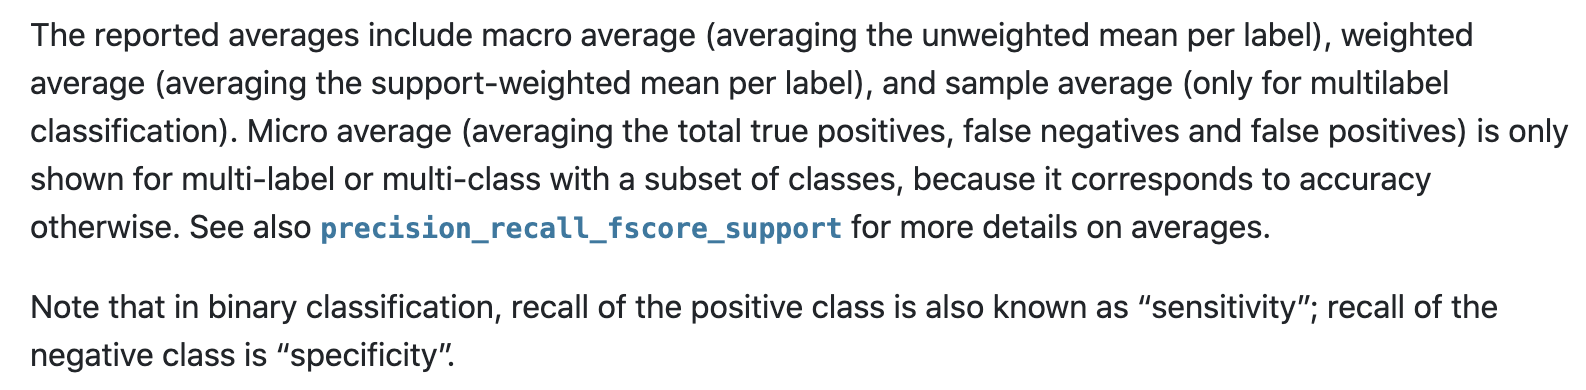

In [53]:
Image(filename='../images/classification_report_summary.png', width=900)

In [610]:
from sklearn.metrics import classification_report

y_pred = d_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=list(np.unique(breast_cancer.target_names))))

              precision    recall  f1-score   support

      benign       0.00      0.00      0.00       107
   malignant       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

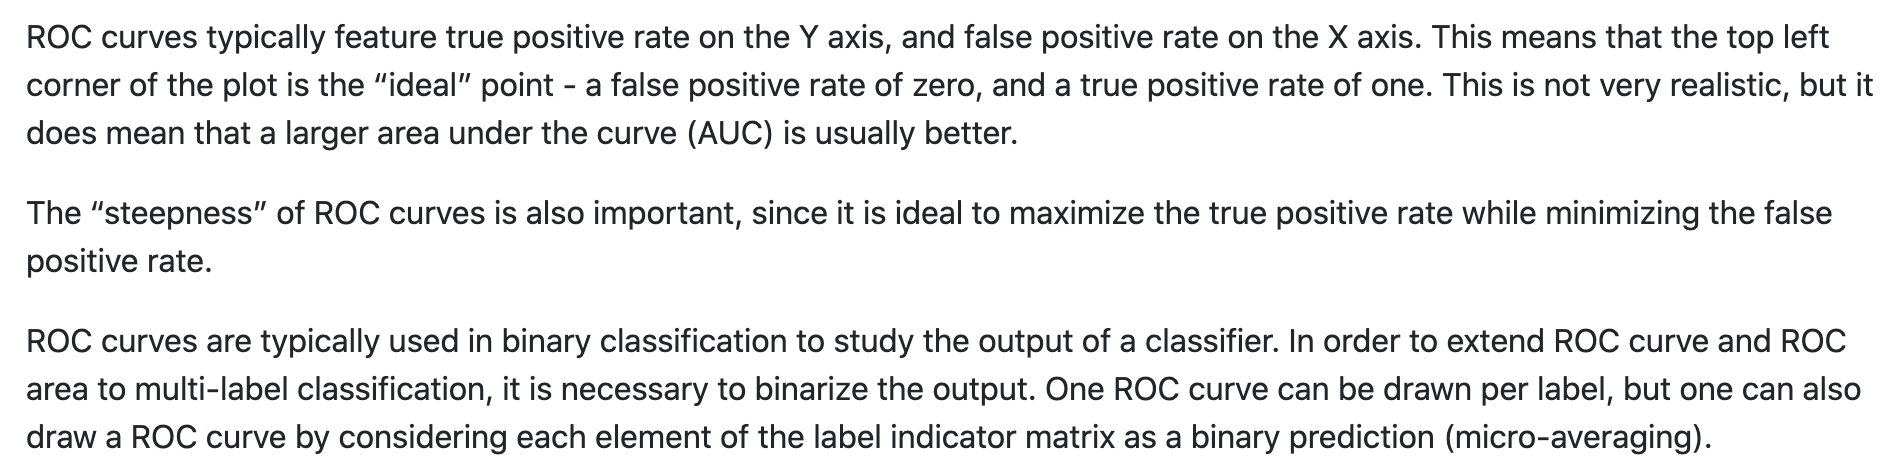

In [58]:
Image(filename='../images/roc_curve_description.png', width=900)

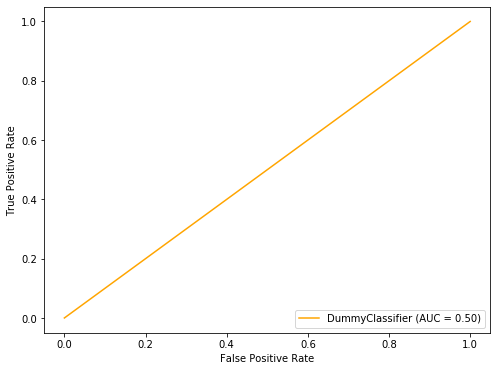

In [611]:
from sklearn.metrics import plot_roc_curve

f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(d_clf, X_test_std, y_test, ax=ax, color='orange');

<a id="logistic_regression"></a>

# [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

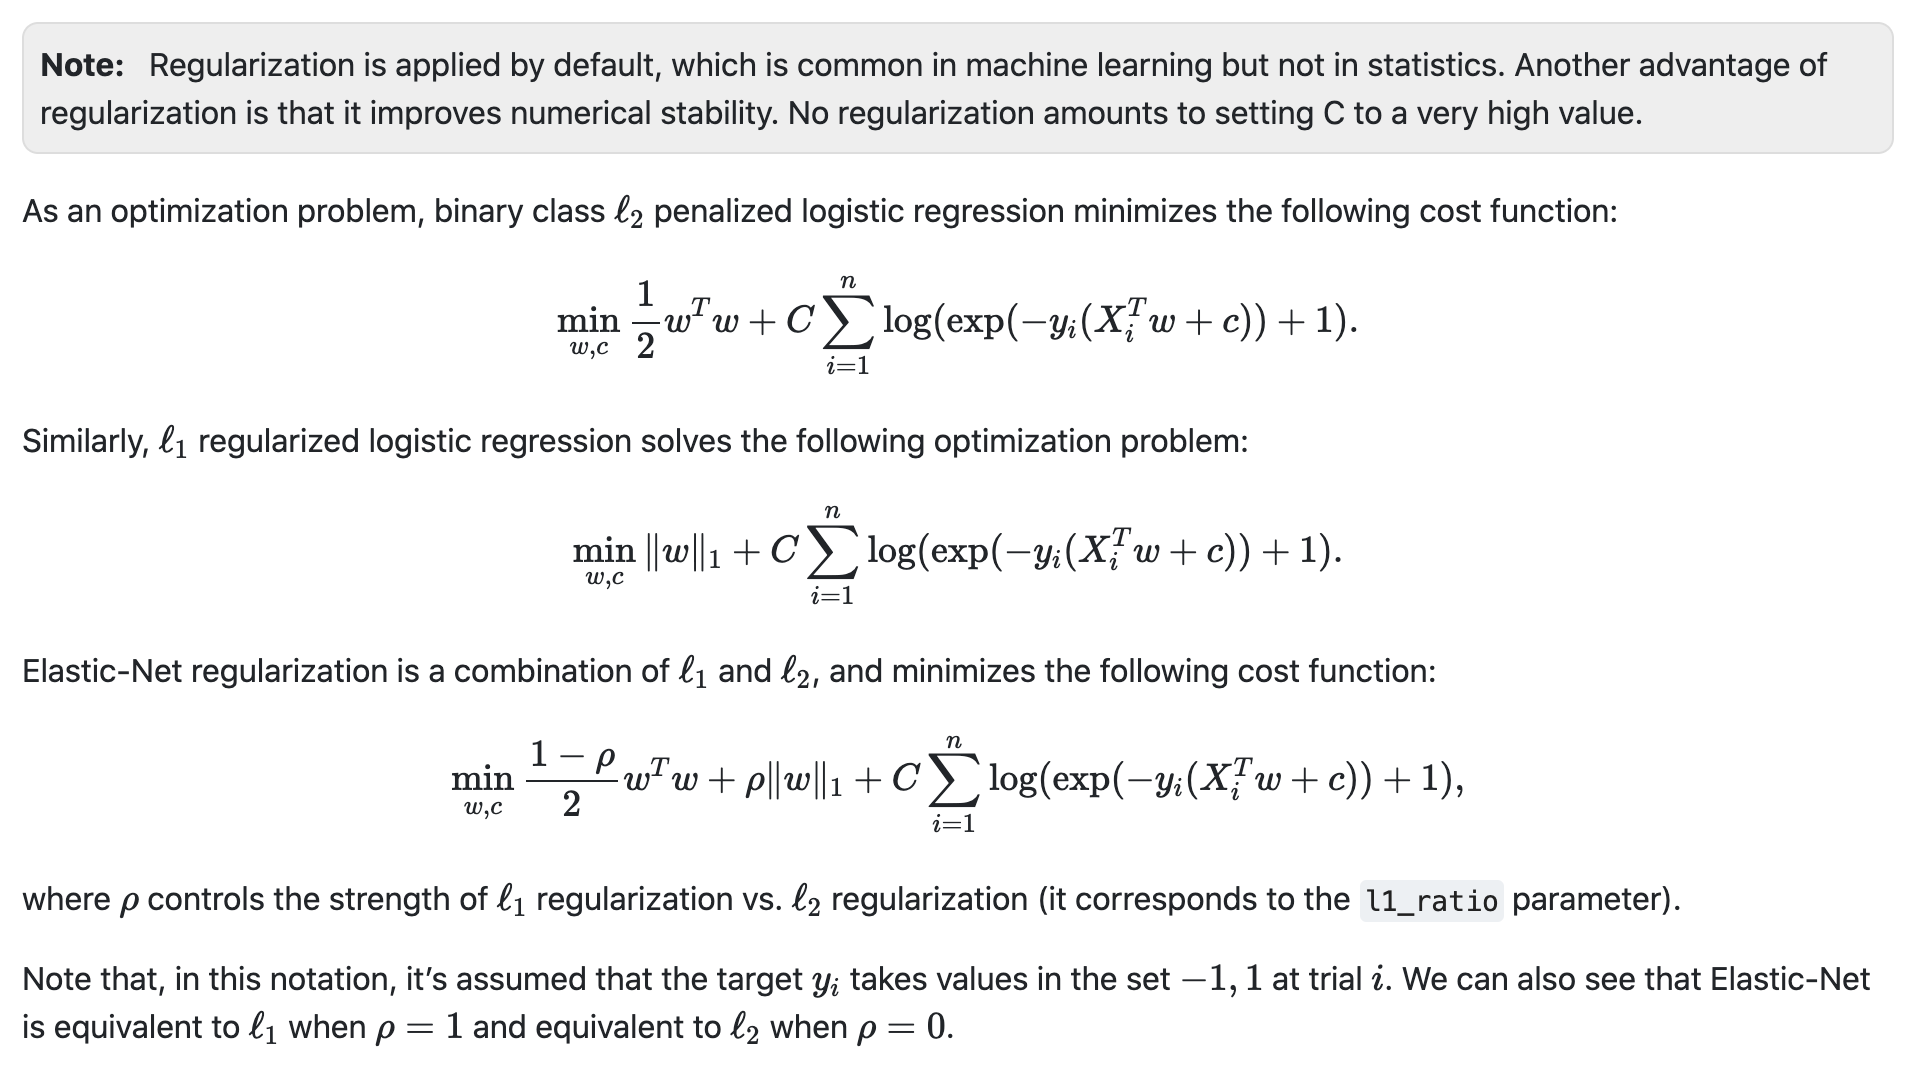

In [61]:
Image(filename='../images/logistic_regression_cost_functions.png', width=900)

In [15]:
from sklearn.linear_model import LogisticRegressionCV

# Cs: Each of the values in Cs describes the inverse of regularization strength

# L1 Ratio: A value of 0 is equivalent to using penalty='l2'
#           A value of 1 is equivalent to using penalty='l1'
#           For 0 < l1_ratio <1, the penalty is a combination of L1 and L2
lr_clf = LogisticRegressionCV(cv=5, 
                              penalty='elasticnet', solver='saga', 
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)), 
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float), 
                              max_iter=1000, 
                              random_state=0)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start

print("LogisticRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings.".format(lr_duration, 
                                                                                                         lr_clf.n_iter_.shape[1], 
                                                                                                         lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]))

print('Optimal regularization strength: {}  Optimal L1 Ratio: {}'.format(lr_clf.C_[0], lr_clf.l1_ratio_[0]))
print('Accuracy (train): {:.2f}'.format(lr_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(lr_clf.score(X_test_std,  y_test)))

LogisticRegressionCV took 5.14 seconds for 5 cv iterations with 24 parameter settings.
Optimal regularization strength: 1.0  Optimal L1 Ratio: 0.0
Accuracy (train): 1.00
Accuracy  (test): 0.96


# [Model parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [659]:
lr_params = dict(zip(list(breast_cancer.feature_names), list(lr_clf.coef_[0])), 
                 intercept=lr_clf.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'worst symmetry': 1.17,
 'worst smoothness': 1.09,
 'radius error': 1.02,
 'worst texture': 0.99,
 'worst concavity': 0.94,
 'worst radius': 0.94,
 'mean texture': 0.82,
 'worst concave points': 0.81,
 'worst area': 0.81,
 'area error': 0.79,
 'worst perimeter': 0.79,
 'perimeter error': 0.78,
 'mean radius': 0.72,
 'mean concave points': 0.71,
 'mean perimeter': 0.69,
 'smoothness error': 0.67,
 'mean area': 0.66,
 'mean concavity': 0.61,
 'worst fractal dimension': 0.46,
 'concave points error': 0.38,
 'worst compactness': 0.05,
 'mean symmetry': -0.01,
 'mean smoothness': -0.06,
 'concavity error': -0.18,
 'texture error': -0.19,
 'symmetry error': -0.22,
 'mean compactness': -0.3,
 'mean fractal dimension': -0.33,
 'intercept': -0.46,
 'fractal dimension error': -0.51,
 'compactness error': -0.82}

# [Predicted class labels](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [660]:
predicted_class_labels = lr_clf.predict(X_test_std)
predicted_class_labels

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# [Predicted probabilities of class labels](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [680]:
predicted_class_probabilities = lr_clf.predict_proba(X_test_std)

[dict(zip(['benign(0)', 'malignant(1)'], map(lambda val: val.round(3), list(arr))), obs_id=i) 
 for (i, arr) in enumerate(list(predicted_class_probabilities))]

[{'benign(0)': 0.999, 'malignant(1)': 0.001, 'obs_id': 0},
 {'benign(0)': 0.007, 'malignant(1)': 0.993, 'obs_id': 1},
 {'benign(0)': 0.0, 'malignant(1)': 1.0, 'obs_id': 2},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 3},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 4},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 5},
 {'benign(0)': 0.0, 'malignant(1)': 1.0, 'obs_id': 6},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 7},
 {'benign(0)': 0.999, 'malignant(1)': 0.001, 'obs_id': 8},
 {'benign(0)': 0.993, 'malignant(1)': 0.007, 'obs_id': 9},
 {'benign(0)': 0.977, 'malignant(1)': 0.023, 'obs_id': 10},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 11},
 {'benign(0)': 0.882, 'malignant(1)': 0.118, 'obs_id': 12},
 {'benign(0)': 0.989, 'malignant(1)': 0.011, 'obs_id': 13},
 {'benign(0)': 1.0, 'malignant(1)': 0.0, 'obs_id': 14},
 {'benign(0)': 0.0, 'malignant(1)': 1.0, 'obs_id': 15},
 {'benign(0)': 0.998, 'malignant(1)': 0.002, 'obs_id': 16},
 {'benign(0)': 0.367, 'mal

# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [17]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

In [18]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

mean                  0.93
standard deviation    0.03
p025                  0.88
p975                  0.96
Name: logistic regression, dtype: float64

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

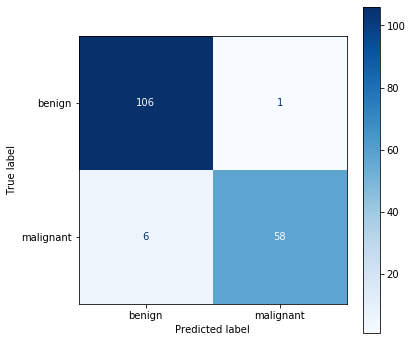

In [616]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(lr_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [22]:
y_pred = lr_clf.predict(X_test_std)

#print(classification_report(y_test, y_pred, 
#                            target_names=list(np.unique(breast_cancer.target_names))))

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [23]:
def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',  
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [24]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

accuracy                                                 0.959064
precision                                                0.983051
recall                                                    0.90625
roc_auc                                                  0.948452
f1_score                                                 0.943089
cohen_kappa                                              0.911208
precision_both           [0.9464285714285714, 0.9830508474576272]
recall_both                         [0.9906542056074766, 0.90625]
fbeta_both                [0.9680365296803651, 0.943089430894309]
support_both                                            [107, 64]
time_to_fit (seconds)                                      5.1392
Name: logistic_regression, dtype: object

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

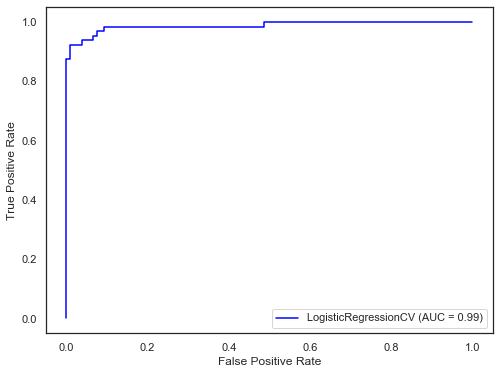

In [25]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(lr_clf, X_test_std, y_test, ax=ax, color='blue');

<a id="k_nearest_neighbors"></a>

# [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

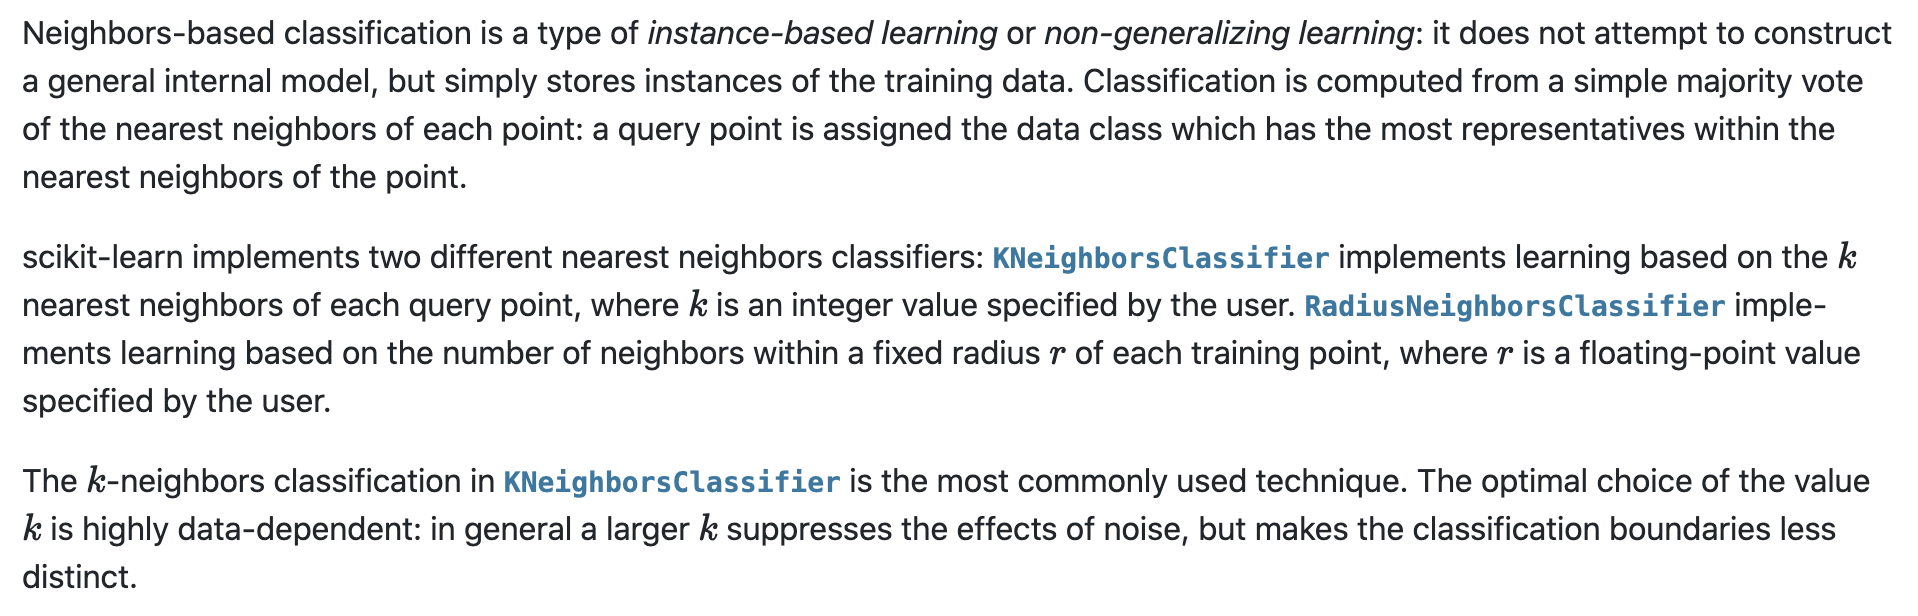

In [62]:
Image(filename='../images/knn_description.png', width=900)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration, 
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 0.77 seconds for 30 candidate parameter settings.
Optimal weights: distance  Optimal n_neighbors: 4
Accuracy (train): 1.00
Accuracy  (test): 0.96


# [Best parameters](https://scikit-learn.org/stable/modules/neighbors.html#neighbors)

In [625]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'distance'}


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [27]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.91
standard deviation    0.05
p025                  0.83
p975                  0.96
Name: k-nearest neighbors, dtype: float64

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

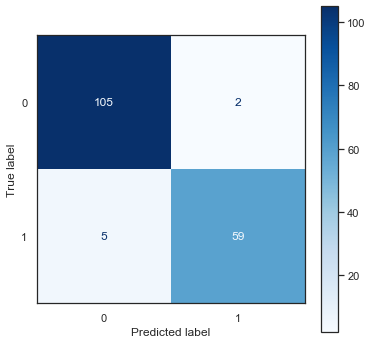

In [29]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_knn, X_test_std, y_test, 
                      ax=ax,
                      #display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [628]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=list(np.unique(breast_cancer.target_names))))

              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       107
   malignant       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [30]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

accuracy                                                 0.959064
precision                                                0.983051
recall                                                    0.90625
roc_auc                                                  0.948452
f1_score                                                 0.943089
cohen_kappa                                              0.911208
precision_both           [0.9464285714285714, 0.9830508474576272]
recall_both                         [0.9906542056074766, 0.90625]
fbeta_both                [0.9680365296803651, 0.943089430894309]
support_both                                            [107, 64]
time_to_fit (seconds)                                    0.768625
Name: k-nearest neighbors, dtype: object

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

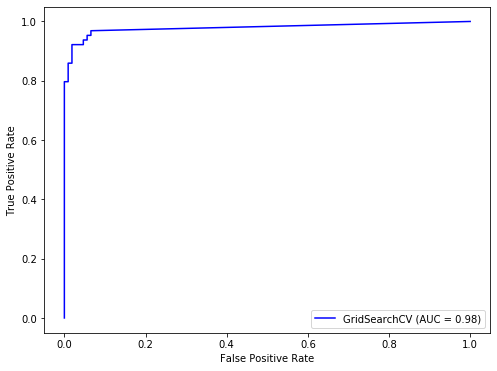

In [630]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_knn, X_test_std, y_test, ax=ax, color='blue');

<a id="linear_discriminant_analysis"></a>

# [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html)

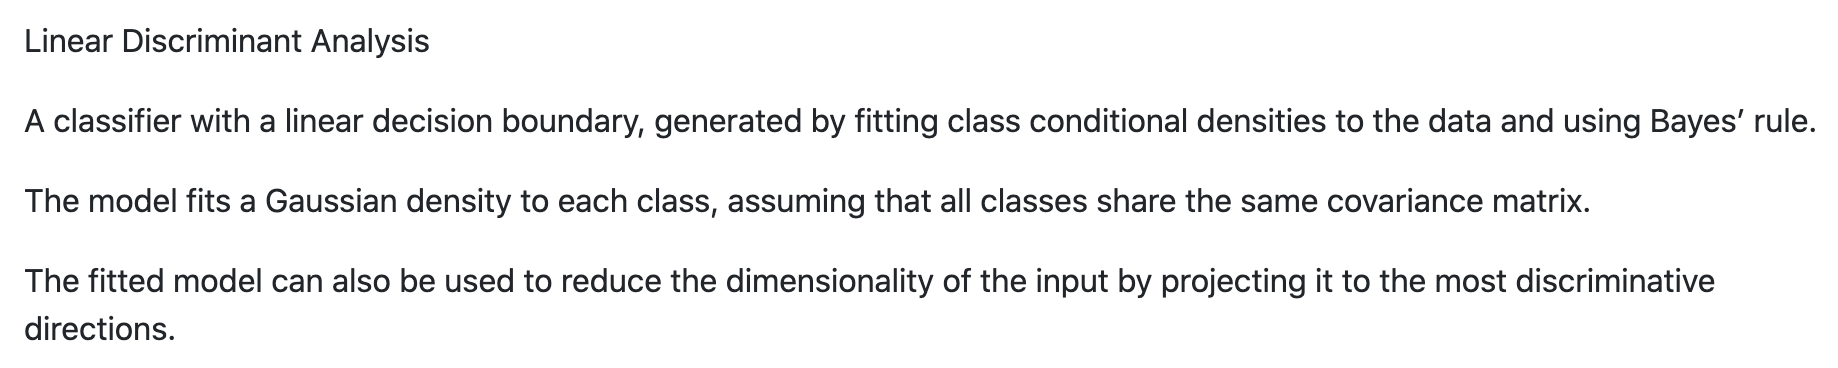

In [67]:
Image(filename='../images/lda_description.png', width=900)

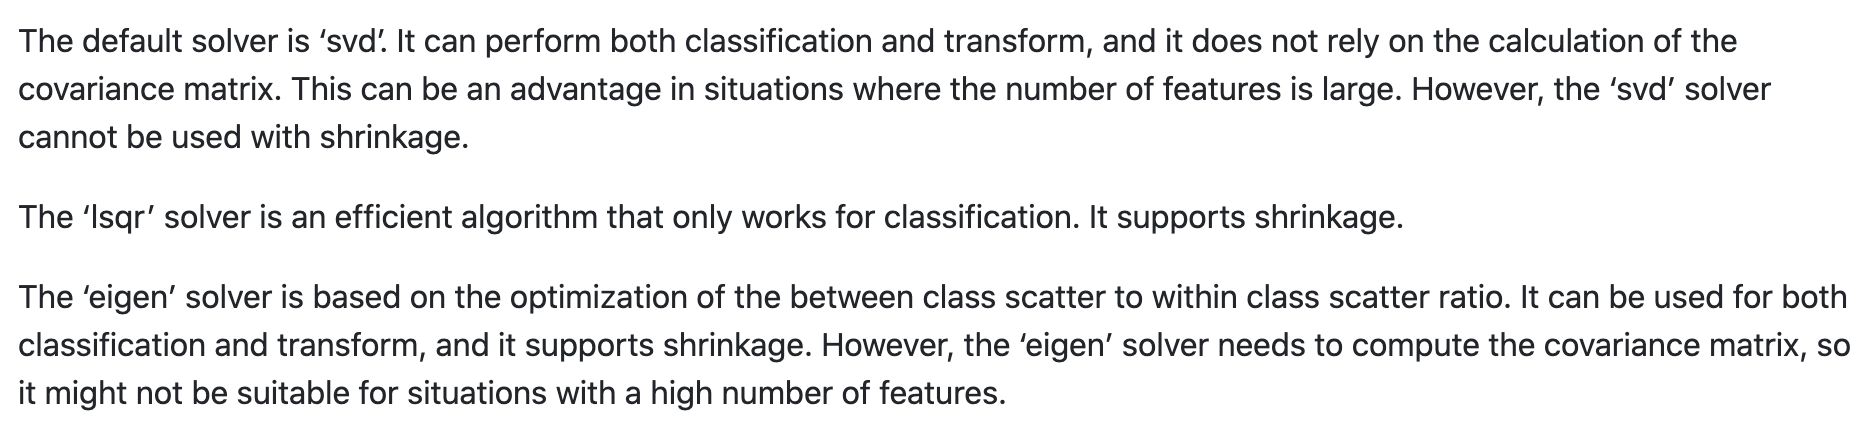

In [68]:
Image(filename='../images/lda_notes.png', width=800)

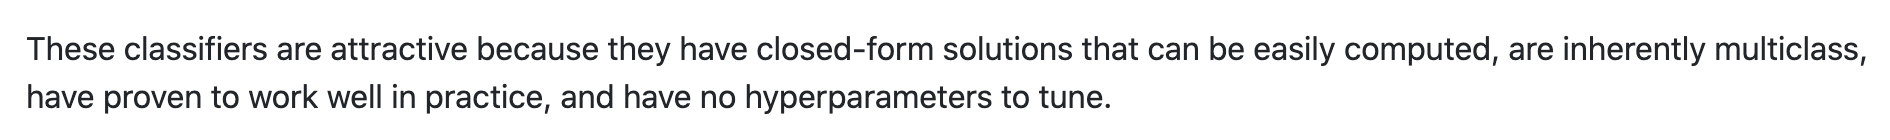

In [69]:
Image(filename='../images/lda_advantages.png', width=900)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'], 
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration, 
                                                                                            len(gs_lda.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_lda.score(X_test_std,  y_test)))

GridSearchCV of LDA took 0.45 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.98
Accuracy  (test): 0.93


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [32]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

mean                  0.91
standard deviation    0.02
p025                  0.87
p975                  0.92
Name: linear discriminanat analysis, dtype: float64

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

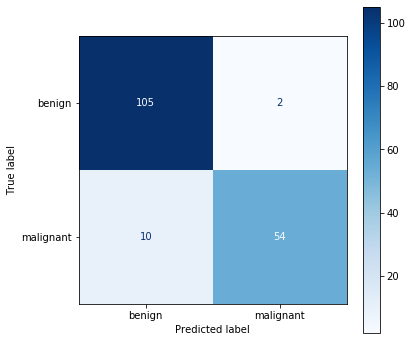

In [632]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_lda, X_test_std, y_test, 
                      ax=ax,
                      display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [633]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=list(np.unique(breast_cancer.target_names))))

              precision    recall  f1-score   support

      benign       0.91      0.98      0.95       107
   malignant       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [512]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

accuracy                                                  0.94152
precision                                                0.965517
recall                                                      0.875
roc_auc                                                  0.928154
f1_score                                                 0.918033
cohen_kappa                                              0.872749
precision_both           [0.9292035398230089, 0.9655172413793104]
recall_both                           [0.9813084112149533, 0.875]
fbeta_both               [0.9545454545454545, 0.9180327868852458]
support_both                                            [107, 64]
time_to_fit (seconds)                                    0.312644
Name: linear discriminant analysis, dtype: object

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

In [634]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_lda, X_test_std, y_test, ax=ax, color='blue');

<a id="support_vector_machines"></a>

# [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)

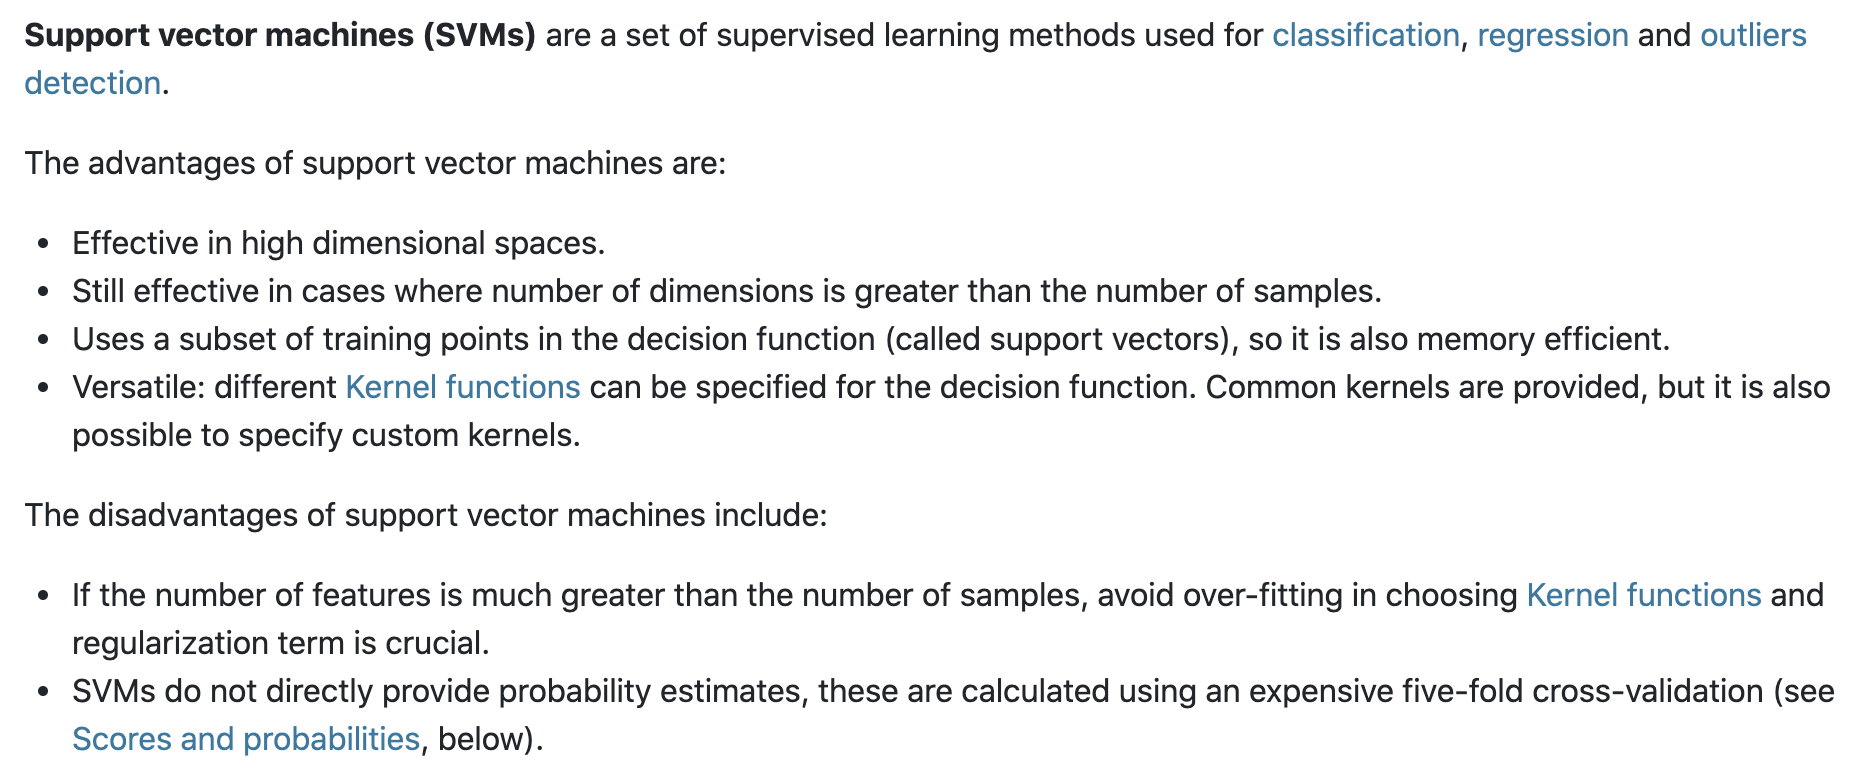

In [70]:
Image(filename='../images/svm_advantages_disadvantages.png', width=900)

In [33]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float)),
              'kernel': ['linear', 'sigmoid', 'rbf'], 
              'gamma': ['auto', 'scale']}

svc_clf = SVC(random_state=0)

gs_svc = GridSearchCV(svc_clf, param_grid=param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
svc_duration = time() - start

print("GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings.".format(svc_duration, 
                                                                                            len(gs_svc.cv_results_['params'])))
# report(gs_svc.cv_results_)
print('Optimal C: {}  Optimal kernel: {}  Optimal gamma: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_svc.score(X_test_std,  y_test)))

GridSearchCV of SVC took 0.40 seconds for 18 candidate parameter settings.
Optimal C: 10.0  Optimal kernel: rbf  Optimal gamma: auto
Accuracy (train): 1.00
Accuracy  (test): 0.95


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [34]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

mean                  0.90
standard deviation    0.03
p025                  0.85
p975                  0.93
Name: support vector machines, dtype: float64

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

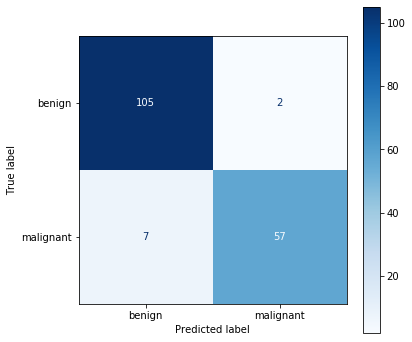

In [636]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_svc, X_test_std, y_test, 
                      ax=ax,
                      display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [637]:
y_pred = gs_svc.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=list(np.unique(breast_cancer.target_names))))

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96       107
   malignant       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [515]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

accuracy                                                  0.94152
precision                                                0.965517
recall                                                      0.875
roc_auc                                                  0.928154
f1_score                                                 0.918033
cohen_kappa                                              0.872749
precision_both           [0.9292035398230089, 0.9655172413793104]
recall_both                           [0.9813084112149533, 0.875]
fbeta_both               [0.9545454545454545, 0.9180327868852458]
support_both                                            [107, 64]
time_to_fit (seconds)                                    0.258778
Name: support vector machines, dtype: object

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

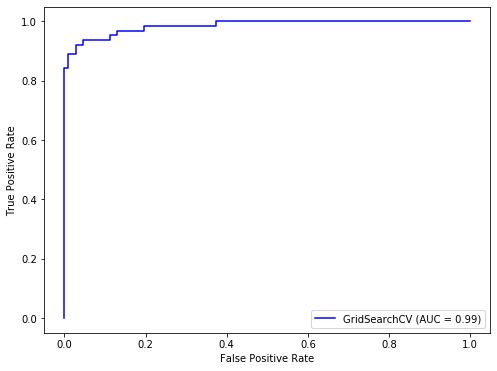

In [324]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_svc, X_test_std, y_test, ax=ax, color='blue');

<a id="random_forest"></a>

# [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest)

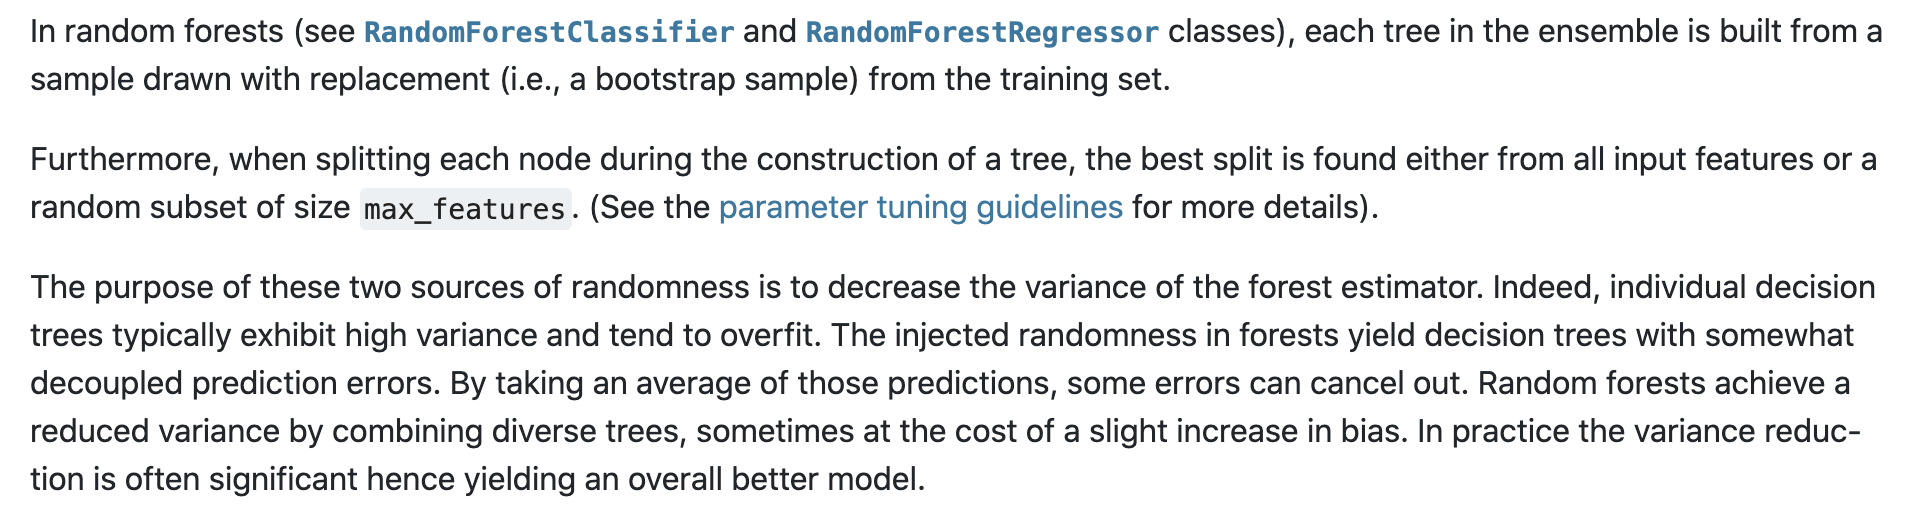

In [71]:
Image(filename='../images/random_forest_description.png', width=900)

In [516]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 1000, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 3, 5, 7]}

rf_clf = RandomForestClassifier(oob_score=True, random_state=0)

gs_rf = GridSearchCV(rf_clf, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration, 
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}  Optimal criterion: {}'.format(gs_rf.best_params_['n_estimators'], 
                                                                                                                gs_rf.best_params_['max_features'], 
                                                                                                                gs_rf.best_params_['max_depth'], 
                                                                                                                gs_rf.best_params_['criterion']))
print('Accuracy (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_rf.score(X_test_std,  y_test)))

GridSearchCV of RF took 682.07 seconds for 120 candidate parameter settings.
Optimal n_estimators: 300  Optimal max_features: sqrt  Optimal max_depth: None  Optimal criterion: entropy
Accuracy (train): 1.00
Accuracy  (test): 0.94


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) score on test set

In [638]:
clf_rf = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'], 
                                max_features=gs_rf.best_params_['max_features'], 
                                max_depth=gs_rf.best_params_['max_depth'], 
                                criterion=gs_rf.best_params_['criterion'], 
                                oob_score=True, 
                                random_state=0)

rf_cv = get_cross_val(clf_rf, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.92
standard deviation    0.05
p025                  0.87
p975                  0.99
Name: random forest, dtype: float64

# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

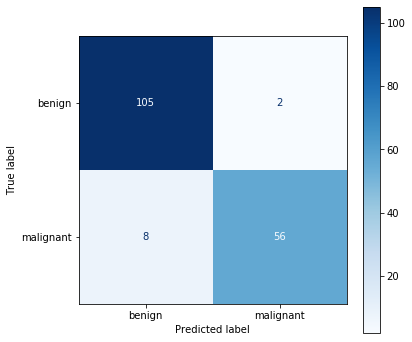

In [336]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_rf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=list(np.unique(breast_cancer.target_names)), 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [567]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=list(np.unique(breast_cancer.target_names))))

              precision    recall  f1-score   support

      benign       0.93      0.98      0.95       107
   malignant       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [566]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

accuracy                                                  0.94152
precision                                                0.965517
recall                                                      0.875
roc_auc                                                  0.928154
f1_score                                                 0.918033
cohen_kappa                                              0.872749
precision_both           [0.9292035398230089, 0.9655172413793104]
recall_both                           [0.9813084112149533, 0.875]
fbeta_both               [0.9545454545454545, 0.9180327868852458]
support_both                                            [107, 64]
time_to_fit (seconds)                                     682.068
Name: random forest, dtype: object

# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

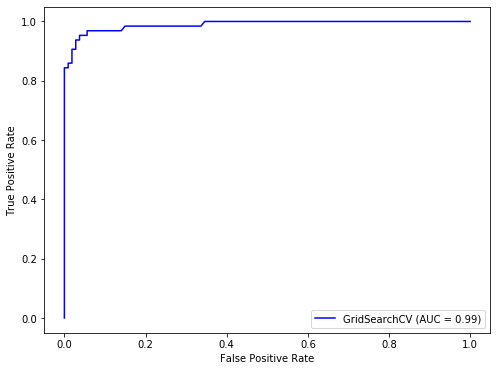

In [639]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_rf, X_test_std, y_test, ax=ax, color='blue');

# [Variable importances](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html) in the random forest model

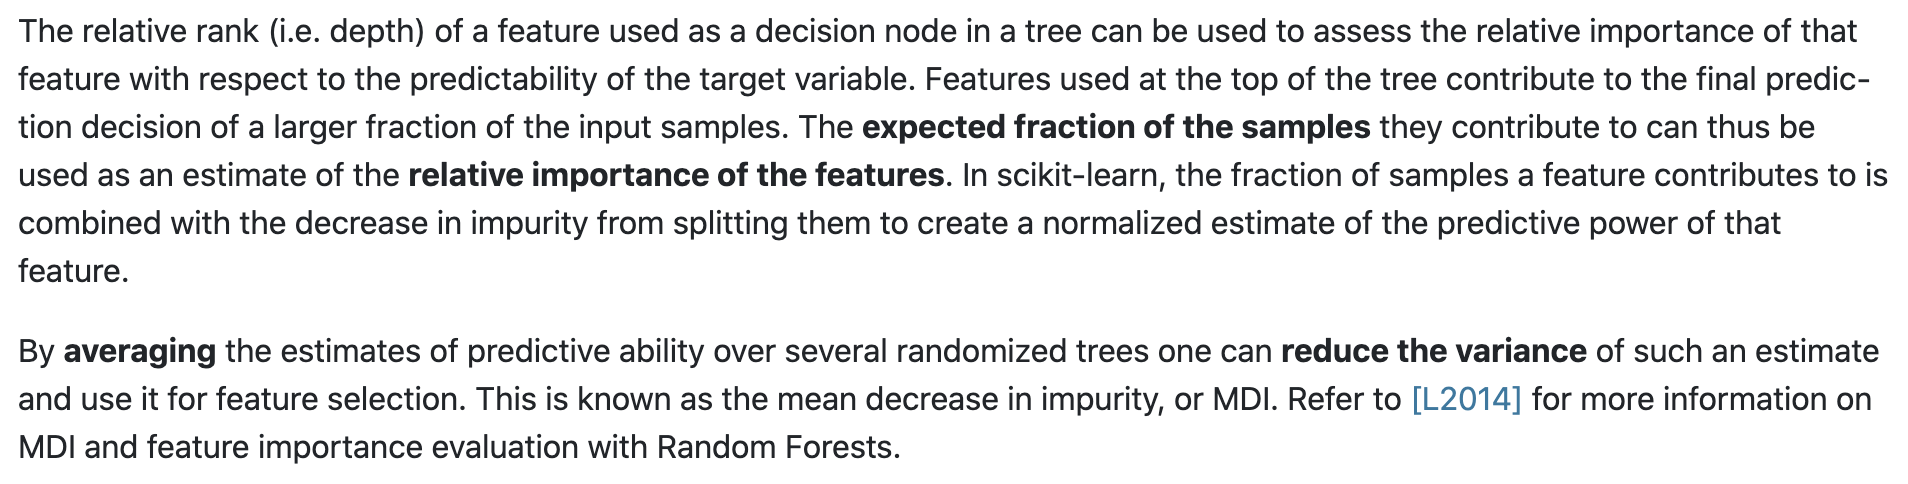

In [72]:
Image(filename='../images/random_forest_feature_importance.png', width=900)

In [568]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(breast_cancer.feature_names))

f, ax = plt.subplots(figsize=(8,16))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

<a id="compare_models"></a>

# Compare Models

# Classification metrics scores and time-to-fit models (in seconds)

In [640]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='f1_score', ascending=False)

accuracy  precision  recall  roc_auc  f1_score  \
logistic_regression               0.96       0.98    0.91     0.95      0.94   
k-nearest neighbors               0.96       0.97    0.92     0.95      0.94   
linear discriminant analysis      0.94       0.97    0.88     0.93      0.92   
support vector machines           0.94       0.97    0.88     0.93      0.92   
random forest                     0.94       0.97    0.88     0.93      0.92   

                              cohen_kappa precision_both   recall_both  \
logistic_regression                  0.91   [0.95, 0.98]  [0.99, 0.91]   
k-nearest neighbors                  0.91   [0.95, 0.97]  [0.98, 0.92]   
linear discriminant analysis         0.87   [0.93, 0.97]  [0.98, 0.88]   
support vector machines              0.87   [0.93, 0.97]  [0.98, 0.88]   
random forest                        0.87   [0.93, 0.97]  [0.98, 0.88]   

                                fbeta_both support_both  time_to_fit (seconds)  
logistic_regression           [0.97, 0.94]    [107, 64]                   3.77  
k-nearest neighbors           [0.97, 0.94]    [107, 64]                   0.56  
linear discriminant analysis  [0.95, 0.92]    [107, 64]                   0.31  
support vector machines       [0.95, 0.92]    [107, 64]                   0.26  
random forest                 [0.95, 0.92]    [107, 64]                 682.07

# Cross-validation scores on test set

In [643]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

mean  standard deviation  p025  p975
logistic regression            0.93                0.03  0.88  0.96
random forest                  0.92                0.05  0.87  0.99
k-nearest neighbors            0.91                0.05  0.83  0.96
linear discriminanat analysis  0.91                0.02  0.87  0.92
support vector machines        0.90                0.03  0.85  0.93

# Plot of mean (+/- std) cross-validation scores

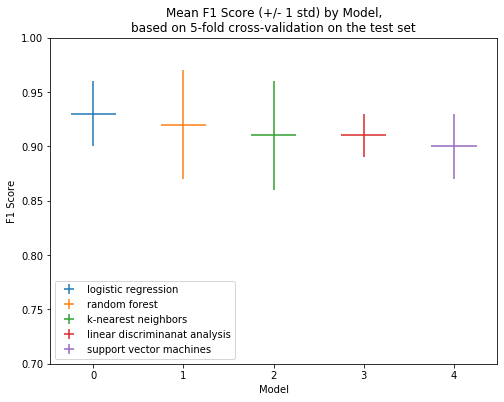

In [644]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left');

[Back to top](#top)